****


## **Chinelo Osuji**
**Broward College**

[LinkedIn](https://linkedin.com/in/chineloosuji/)

****

****


# **ARIMAX (Autoregressive Integrated Moving Average with eXogenous variables) Model**

$Y_t = c + \sum_{i=1}^{p} \phi_i Y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \beta_1 X_{1,t} + \beta_2 X_{2,t} + \varepsilon_t$

where:

- $Y_t$: The dependent variable representing the value of the time series at time $t$. It is the variable that the model aims to forecast or explain.

- $c$: A constant term or intercept in the equation, representing the baseline value of $Y_t$ when all other variables are equal to zero.

- $\phi_i$: Coefficients for the autoregressive (AR) terms. These coefficients measure the impact of the past values of the series on its current value.
Specifically, $\phi_i$ is the coefficient of the $i$-th lagged value of $Y_t$, indicating how much a change in $Y_{t-i}$ affects $Y_t$.

- $Y_{t-i}$: The $i$-th lagged value of the time series, meaning the value of $Y$ at time $t-i$. These lagged values are used to capture the influence of past values of the time series on its current value.

- $\theta_j$: Coefficients for the moving average (MA) terms. These coefficients represent the impact of past forecast errors on the current value of the series. Each $\theta_j$ is associated with the $j$-th lagged forecast error.

- $\varepsilon_{t-j}$: The forecast error at time $t-j$, which is the difference between the observed value and the predicted value at that lag. It represents the unpredicted part of $Y$ at time $t-j$.

- $\beta_1, \beta_2$: Coefficients for the exogenous variables $X_{1,t}$ and $X_{2,t}$. These coefficients measure the impact of the external variables on the dependent variable $Y_t$. They show how much a unit change in each exogenous variable affects $Y_t$.

- $X_{1,t}, X_{2,t}$: The exogenous variables at time $t$. In this model, $X_{1,t}$ represent hurricane events, capturing their impact on $Y_t$, while $X_{2,t}$ represent economic events, indicating how economic factors at time $t$ affect $Y_t$.

- $\varepsilon_t$: The error term at time $t$, accounting for random fluctuations or noise in $Y_t$ that are not explained by the autoregressive, moving average, or exogenous components of the model. This term ensures that the model accounts for stochastic variations in the time series.





****

****


# **Including Hurricane Events as Exogenous Variables to Analyze Thier Influence**


****

In [ ]:
start_date = '1978-11-01'
end_date = '2024-01-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
hurricane_df = pd.DataFrame(index=date_range)
hurricane_df['hurricane'] = 0
hurricane_df['hurricane_name'] = pd.NA
hurricane_df['hurricane_name'].fillna(0, inplace=True)
hurricane_df

hurricane  hurricane_name
1978-11-01          0               0
1978-12-01          0               0
1979-01-01          0               0
1979-02-01          0               0
1979-03-01          0               0
...               ...             ...
2023-09-01          0               0
2023-10-01          0               0
2023-11-01          0               0
2023-12-01          0               0
2024-01-01          0               0

[543 rows x 2 columns]

****

# **Now We Input Multiple Hurricane Events Into the Dataframe with Binary Indicators.**


****

In [ ]:
start_date = '1978-11-01'
end_date = '2024-01-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

In [ ]:
hurricane_df2 = pd.DataFrame(index=date_range)
hurricane_df2['hurricane'] = 0
hurricane_df2['hurricane_name'] = [[] for _ in range(len(hurricane_df2))]

In [ ]:
def add_hurricane(start_date, end_date, hurricane_name, binary_score=1):
    for date in pd.date_range(start=start_date, end=end_date, freq='MS'):
        hurricane_df2.at[date, 'hurricane'] = binary_score
        hurricane_df2.at[date, 'hurricane_name'].append(hurricane_name)

In [ ]:
add_hurricane('2023-08-01', '2023-11-01', 'Idalia', binary_score=1)
add_hurricane('2022-09-01', '2022-12-01', 'Ian', binary_score=1)
add_hurricane('2018-10-01', '2019-01-01', 'Michael', binary_score=1)
add_hurricane('2017-09-01', '2017-12-01', 'Irma', binary_score=1)
add_hurricane('2008-08-01', '2008-10-01', 'Fay', binary_score=1)
add_hurricane('2005-07-01', '2005-08-01', 'Dennis', binary_score=1)
add_hurricane('2005-10-01', '2006-01-01', 'Wilma', binary_score=1)
add_hurricane('2005-08-01', '2005-10-01', 'Katrina', binary_score=1)
add_hurricane('2004-08-01', '2004-11-01', 'Charley', binary_score=1)
add_hurricane('2004-09-01', '2005-01-01', 'Ivan', binary_score=1)
add_hurricane('2004-09-01', '2004-12-01', 'Jeanne', binary_score=1)
add_hurricane('2000-08-01', '2000-10-01', 'Debby', binary_score=1)
add_hurricane('1995-10-01', '1996-01-01', 'Opal', binary_score=1)
add_hurricane('1992-08-01', '1992-11-01', 'Andrew', binary_score=1)
add_hurricane('1985-09-01', '1985-12-01', 'Elena', binary_score=1)

In [ ]:
merged_data2 = pd.merge(hurricane_df2, CPI, left_index=True, right_index=True, how='left')

In [ ]:
merged_data2.loc['2004-01-01':'2006-04-01']

hurricane           hurricane_name  Consumer_Price_Index  \
2004-01-01          0                       []                 124.0   
2004-02-01          0                       []                 123.9   
2004-03-01          0                       []                 123.9   
2004-04-01          0                       []                 123.9   
2004-05-01          0                       []                 123.9   
2004-06-01          0                       []                 124.0   
2004-07-01          0                       []                 123.9   
2004-08-01          1                [Charley]                 123.8   
2004-09-01          1  [Charley, Ivan, Jeanne]                 123.7   
2004-10-01          1  [Charley, Ivan, Jeanne]                 123.6   
2004-11-01          1  [Charley, Ivan, Jeanne]                 124.0   
2004-12-01          1           [Ivan, Jeanne]                 124.0   
2005-01-01          1                   [Ivan]                 128.4   
2005-02-01          0                       []                 128.4   
2005-03-01          0                       []                 128.5   
2005-04-01          0                       []                 131.5   
2005-05-01          0                       []                 131.5   
2005-06-01          0                       []                 131.3   
2005-07-01          1                 [Dennis]                 131.2   
2005-08-01          1        [Dennis, Katrina]                 131.2   
2005-09-01          1                [Katrina]                 131.4   
2005-10-01          1         [Wilma, Katrina]                 132.0   
2005-11-01          1                  [Wilma]                 133.0   
2005-12-01          1                  [Wilma]                 133.0   
2006-01-01          1                  [Wilma]                 161.6   
2006-02-01          0                       []                 161.3   
2006-03-01          0                       []                 161.0   
2006-04-01          0                       []                 160.7   

            CPI_DIFF_1  DIFF_PREDICTION_8020  DIFF_PREDICTION_9010  \
2004-01-01        -0.2               152.377               145.786   
2004-02-01        -0.1               152.377               145.786   
2004-03-01         0.0               152.377               145.786   
2004-04-01         0.0               152.377               145.786   
2004-05-01         0.0               152.377               145.786   
2004-06-01         0.1               152.377               145.786   
2004-07-01        -0.1               152.377               145.786   
2004-08-01        -0.1               152.377               145.786   
2004-09-01        -0.1               152.377               145.786   
2004-10-01        -0.1               152.377               145.786   
2004-11-01         0.4               152.377               145.786   
2004-12-01         0.0               152.377               145.786   
2005-01-01         4.4               152.377               145.786   
2005-02-01         0.0               152.377               145.786   
2005-03-01         0.1               152.377               145.786   
2005-04-01         3.0               152.377               145.786   
2005-05-01         0.0               152.377               145.786   
2005-06-01        -0.2               152.377               145.786   
2005-07-01        -0.1               152.377               145.786   
2005-08-01         0.0               152.377               145.786   
2005-09-01         0.2               152.377               145.786   
2005-10-01         0.6               152.377               145.786   
2005-11-01         1.0               152.377               145.786   
2005-12-01         0.0               152.377               145.786   
2006-01-01        28.6               152.377               145.786   
2006-02-01        -0.3               152.377               145.786   
2006-03-01        -0.3           

In [ ]:
import matplotlib.lines as mlines

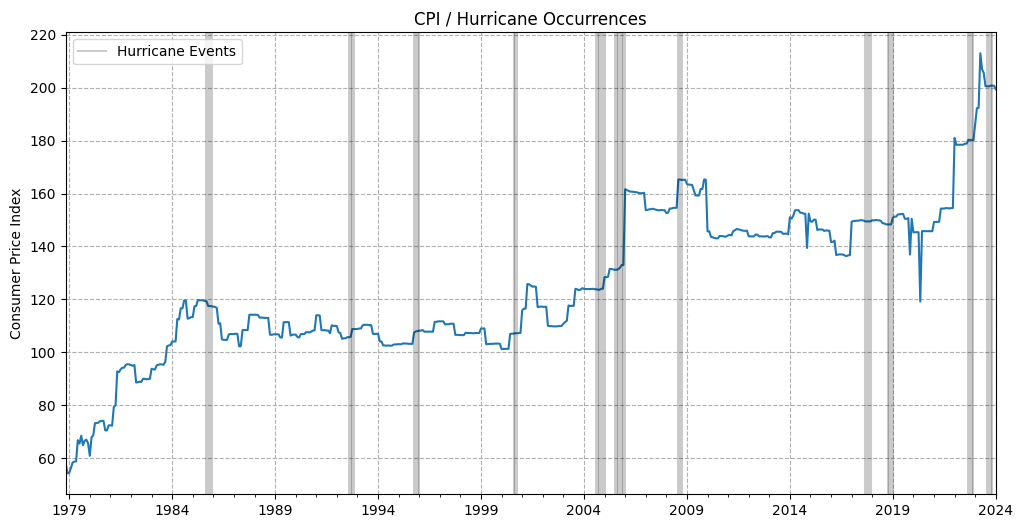

In [ ]:
title='CPI / Hurricane Occurrences'
ylabel='Consumer Price Index'
xlabel=''

ax = merged_data2['Consumer_Price_Index'].plot(legend=True,figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in merged_data2.query('hurricane==1').index:
    ax.axvline(x=x, color='k', alpha = 0.2);
hurricane_line = mlines.Line2D([], [], color='k', alpha=0.2, label='Hurricane Events')
ax.legend(handles=[hurricane_line])
plt.grid(True, linestyle='--')
plt.show()

****

**There is no obvious pattern that shows a consistent spike in CPI following hurricane occurrences.**

**While some increases in CPI align with hurricane occurrences, this pattern is not consistent across all occurrences.**






****

****


# **We Also Include Economic "Increase" Events as Exogenous Variables to Analyze Thier Influence**

### **These are events that we believe can influence increase in the CPI of energy services in Florida**

****

In [ ]:
start_date = '1978-11-01'
end_date = '2024-01-01'
economic_increase_df = pd.DataFrame(index=date_range)
economic_increase_df['economic'] = 0
economic_increase_df['economic_increase_event'] = pd.NA
economic_increase_df['economic_increase_event'].fillna(0, inplace=True)
economic_increase_df

economic  economic_increase_event
1978-11-01         0                        0
1978-12-01         0                        0
1979-01-01         0                        0
1979-02-01         0                        0
1979-03-01         0                        0
...              ...                      ...
2023-09-01         0                        0
2023-10-01         0                        0
2023-11-01         0                        0
2023-12-01         0                        0
2024-01-01         0                        0

[543 rows x 2 columns]

****

# **Now We Input Multiple Economic "Increase" Events Into the Dataframe with Binary Indicators.**





*   **2023 - $560 Million Rate Increase -** https://www.flpublicpower.com/news/fpl-rates-get-beefed-up-approval#:~:text=After%20approval%20by%20the%20commission,pay%20for%20solar%2Denergy%20projects

*   **2022 - $692 Million Rate Increase -** https://www.flpublicpower.com/news/fpl-rates-get-beefed-up-approval#:~:text=After%20approval%20by%20the%20commission,pay%20for%20solar%2Denergy%20projects


*   **2016 - FPL is finalizing a base rate increase proposal that would cover the next four years (2017-2020), providing longer-term cost certainty for customers -** https://newsroom.fpl.com/2016-01-15-FPL-begins-process-of-setting-base-rates-for-2017-2020#:~:text=FPL%20expects%20the%20proposal%20to,1%2C000%2DkWh%20residential%20customer%20bill



*   **2014 - FPL files 2014 fuel projections - bill expected to increase -** https://newsroom.fpl.com/2013-08-30-FPL-files-2014-fuel-projections-bill-expected-to-increase-while-remaining-lowest-in-Florida-and-well-below-national-average?mobile=No



*   **2003 - FPL seeks another rate hike by more than 6 percent -** https://www.heraldtribune.com/story/news/2003/06/14/fpl-seeks-another-rate-hike/28753219007/

    https://www.theledger.com/story/news/2003/03/05/utilities-win-rate-increases/26041871007/




*   **2001 - 8.7 Percent FPL Electricity Bill Increase for Residential Customers -** https://newsroom.fpl.com/2000-09-21-FPL-Seeks-To-Spread-Unprecedented-Fuel-Costs-Over-Two-Years-Plan-Will-Limit-Impact-On-Electricity-Bills-To-8-7-Percent







****

In [ ]:
start_date = '1978-11-01'
end_date = '2024-01-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

In [ ]:
economic_increase_df2 = pd.DataFrame(index=date_range)
economic_increase_df2['economic'] = 0
economic_increase_df2['economic_increase_event'] = [[] for _ in range(len(economic_increase_df2))]

In [ ]:
def add_economic_increase(start_date, end_date, economic_increase_event, binary_score=1):
    for date in pd.date_range(start=start_date, end=end_date, freq='MS'):
        economic_increase_df2.at[date, 'economic'] = binary_score
        economic_increase_df2.at[date, 'economic_increase_event'].append(economic_increase_event)

In [ ]:
add_economic_increase('2021-12-01', '2022-03-01', '692 Million Rate Increase', binary_score=1)
add_economic_increase('2022-12-01', '2023-03-01', '560 Million Rate Increase', binary_score=1)
add_economic_increase('2016-11-01', '2017-02-01', 'Base Rate Increase', binary_score=1)
add_economic_increase('2013-11-01', '2014-02-01', 'Fuel Cost Increase2', binary_score=1)
add_economic_increase('2003-04-01', '2003-08-01', 'Fuel Cost Increase', binary_score=1)
add_economic_increase('2000-11-01', '2001-02-01', 'Residential Bill Increase', binary_score=1)

In [ ]:
merged_data3 = pd.merge(economic_increase_df2, merged_data2, left_index=True, right_index=True, how='left')

In [ ]:
merged_data3.loc['2018-01-01':'2023-02-01']

economic      economic_increase_event  hurricane hurricane_name  \
2018-01-01         0                           []          0             []   
2018-02-01         0                           []          0             []   
2018-03-01         0                           []          0             []   
2018-04-01         0                           []          0             []   
2018-05-01         0                           []          0             []   
...              ...                          ...        ...            ...   
2022-10-01         0                           []          1          [Ian]   
2022-11-01         0                           []          1          [Ian]   
2022-12-01         1  [560 Million Rate Increase]          1          [Ian]   
2023-01-01         1  [560 Million Rate Increase]          0             []   
2023-02-01         1  [560 Million Rate Increase]          0             []   

            Consumer_Price_Index  CPI_DIFF_1  DIFF_PREDICTION_8020  \
2018-01-01               149.928       0.460            160.663640   
2018-02-01               149.775      -0.153            160.676925   
2018-03-01               150.013       0.238            160.785036   
2018-04-01               149.873      -0.140            161.112791   
2018-05-01               149.891       0.018            161.516383   
...                          ...         ...                   ...   
2022-10-01               180.216      -0.067            172.882407   
2022-11-01               180.178      -0.038            173.134980   
2022-12-01               180.163      -0.015            173.337504   
2023-01-01               186.395       6.232            173.509323   
2023-02-01               192.229       5.834            173.705484   

            DIFF_PREDICTION_9010  DIFF_PREDICTION_7030  
2018-01-01            145.786000            193.944360  
2018-02-01            145.786000            194.230367  
2018-03-01            145.786000            194.516374  
2018-04-01            145.786000            194.802381  
2018-05-01            145.786000            195.088389  
...                          ...                   ...  
2022-10-01            144.837519            210.246770  
2022-11-01            145.002478            210.532777  
2022-12-01            145.167449            210.818784  
2023-01-01            145.332412            211.104791  
2023-02-01            145.497373            211.390799  

[62 rows x 9 columns]

****


# **We Also Include Economic "Decrease" Events as Exogenous Variables to Analyze Thier Influence**

### **These are events that we believe can influence decrease in the CPI of energy services in Florida**

****

In [ ]:
start_date = '1978-11-01'
end_date = '2024-01-01'
economic_decrease_df = pd.DataFrame(index=date_range)
economic_decrease_df['economic2'] = 0
economic_decrease_df['economic_decrease_event'] = pd.NA
economic_decrease_df['economic_decrease_event'].fillna(0, inplace=True)
economic_decrease_df

economic2  economic_decrease_event
1978-11-01          0                        0
1978-12-01          0                        0
1979-01-01          0                        0
1979-02-01          0                        0
1979-03-01          0                        0
...               ...                      ...
2023-09-01          0                        0
2023-10-01          0                        0
2023-11-01          0                        0
2023-12-01          0                        0
2024-01-01          0                        0

[543 rows x 2 columns]

****

# **Now We Input Multiple Economic "Decrease" Events Into the Dataframe with Binary Indicators.**



*   **2020 - COVID-19 Pandemic**  https://floridapolitics.com/archives/619943-ron-desantis-claims-florida-lockdowns-lasted-weeks-but-some-of-his-own-orders-lasted-months/


*   **2016 - Average Bill Decrease for Customers -** https://newsroom.fpl.com/2015-11-04-FPL-bills-to-decrease-again-in-2016-as-investments-in-efficiency-deliver-continued-savings-for-customers


*   **2010 - $9 Average Bill Decrease for Customers -** https://newsroom.nexteraenergy.com/FPL-expects-2010-typical-customer-bill-to-be-the-lowest-in-four-years?l=12





*   **2002 - 7-Percent Base-Rate Reduction -** https://newsroom.fpl.com/2002-03-14-FPL-Office-of-Public-Counsel-Agree-on-7-Percent-Base-Rate-Reduction-Customers-to-Save-Approximately-1-Billion-Through-2005?mobile=No






*   **1999 - Florida Power & Light agrees to state's largest-ever rate reduction -** https://www.theledger.com/story/news/1999/03/11/florida-power-light-agrees-to-states-largest-ever-rate-reduction/26524869007/








****

In [ ]:
start_date = '1978-11-01'
end_date = '2024-01-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

In [ ]:
economic_decrease_df2 = pd.DataFrame(index=date_range)
economic_decrease_df2['economic2'] = 0
economic_decrease_df2['economic_decrease_event'] = [[] for _ in range(len(economic_decrease_df2))]

In [ ]:
def add_economic_decrease(start_date, end_date, economic_decrease_event, binary_score=1):
    for date in pd.date_range(start=start_date, end=end_date, freq='MS'):
        economic_decrease_df2.at[date, 'economic2'] = binary_score
        economic_decrease_df2.at[date, 'economic_decrease_event'].append(economic_decrease_event)

In [ ]:
add_economic_decrease('2009-11-01', '2010-02-01', 'FPL Average Bill Decrease', binary_score=1)
add_economic_decrease('2015-11-01', '2016-03-01', 'FPL Average Bill Decrease2', binary_score=1)
add_economic_decrease('2019-10-01', '2020-02-01', 'COVID19 Pandemic', binary_score=1)
add_economic_decrease('2020-03-01', '2020-05-01', 'COVID19 Lockdown', binary_score=1)
add_economic_decrease('2003-01-01', '2003-04-01', 'FPL Base Rate Reduction', binary_score=1)
add_economic_decrease('1999-02-01', '1999-05-01', 'Rate Reduction', binary_score=1)

In [ ]:
merged_data = pd.merge(economic_decrease_df2, merged_data3, left_index=True, right_index=True, how='left')

In [ ]:
merged_data.loc['2009-11-01':'2016-03-01']

economic2       economic_decrease_event  economic  \
2009-11-01          1   [FPL Average Bill Decrease]         0   
2009-12-01          1   [FPL Average Bill Decrease]         0   
2010-01-01          1   [FPL Average Bill Decrease]         0   
2010-02-01          1   [FPL Average Bill Decrease]         0   
2010-03-01          0                            []         0   
...               ...                           ...       ...   
2015-11-01          1  [FPL Average Bill Decrease2]         0   
2015-12-01          1  [FPL Average Bill Decrease2]         0   
2016-01-01          1  [FPL Average Bill Decrease2]         0   
2016-02-01          1  [FPL Average Bill Decrease2]         0   
2016-03-01          1  [FPL Average Bill Decrease2]         0   

           economic_increase_event  hurricane hurricane_name  \
2009-11-01                      []          0             []   
2009-12-01                      []          0             []   
2010-01-01                      []          0             []   
2010-02-01                      []          0             []   
2010-03-01                      []          0             []   
...                            ...        ...            ...   
2015-11-01                      []          0             []   
2015-12-01                      []          0             []   
2016-01-01                      []          0             []   
2016-02-01                      []          0             []   
2016-03-01                      []          0             []   

            Consumer_Price_Index  CPI_DIFF_1  DIFF_PREDICTION_8020  \
2009-11-01               165.256       3.562            152.377000   
2009-12-01               165.274       0.018            152.377000   
2010-01-01               145.716     -19.558            152.377000   
2010-02-01               145.741       0.025            152.377000   
2010-03-01               143.656      -2.085            152.377000   
...                          ...         ...                   ...   
2015-11-01               145.974      -0.082            154.846388   
2015-12-01               145.976       0.002            154.767296   
2016-01-01               141.702      -4.274            155.119406   
2016-02-01               141.702       0.000            155.719170   
2016-03-01               142.192       0.490            156.096482   

            DIFF_PREDICTION_9010  DIFF_PREDICTION_7030  
2009-11-01               145.786            165.829038  
2009-12-01               145.786            166.192377  
2010-01-01               145.786            166.539533  
2010-02-01               145.786            166.830343  
2010-03-01               145.786            167.078041  
...                          ...                   ...  
2015-11-01               145.786            186.508173  
2015-12-01               145.786            186.794180  
2016-01-01               145.786            187.080187  
2016-02-01               145.786            187.366195  
2016-03-01               145.786            187.652202  

[77 rows x 11 columns]

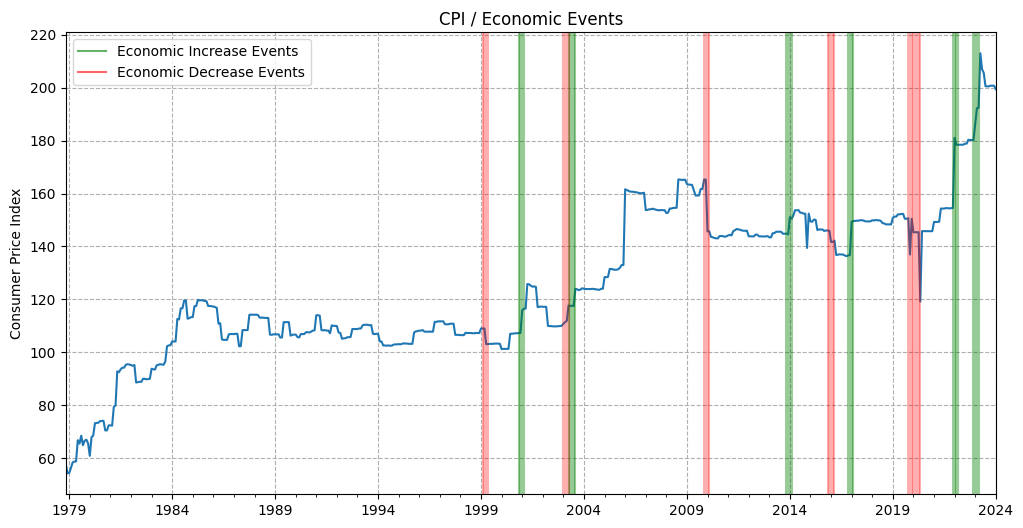

In [ ]:
title='CPI / Economic Events'
ylabel='Consumer Price Index'
xlabel=''

ax = merged_data['Consumer_Price_Index'].plot(legend=True,figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in merged_data.query('economic==1').index:
    ax.axvline(x=x, color='green', alpha=0.4)
for x in merged_data.query('economic2==1').index:
    ax.axvline(x=x, color='red', alpha=0.3)
economic_line = mlines.Line2D([], [], color='red', alpha=0.6, label='Economic Decrease Events')
economic_line2 = mlines.Line2D([], [], color='green', alpha=0.6, label='Economic Increase Events')
ax.legend(handles=[economic_line2, economic_line])
plt.grid(True, linestyle='--')
plt.show()

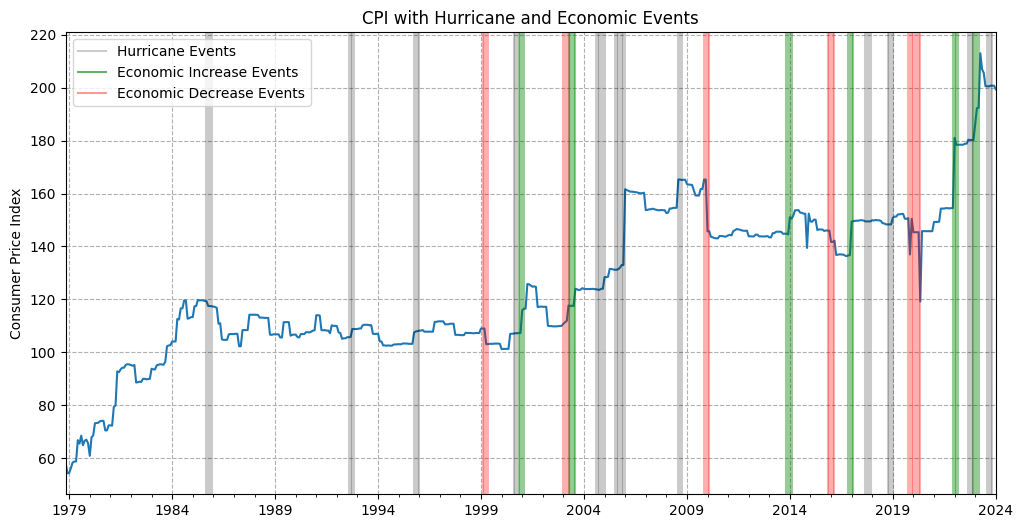

In [ ]:
title = 'CPI with Hurricane and Economic Events'
ylabel = 'Consumer Price Index'
xlabel = ''
ax = merged_data['Consumer_Price_Index'].plot(legend=True, figsize=(12, 6), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in merged_data.query('hurricane==1').index:
    ax.axvline(x=x, color='k', alpha=0.2)
for x in merged_data.query('economic==1').index:
    ax.axvline(x=x, color='green', alpha=0.4)
for x in merged_data.query('economic2==1').index:
    ax.axvline(x=x, color='red', alpha=0.3)
hurricane_line = mlines.Line2D([], [], color='k', alpha=0.2, label='Hurricane Events')
economic_line = mlines.Line2D([], [], color='red', alpha=0.4, label='Economic Decrease Events')
economic_line2 = mlines.Line2D([], [], color='green', alpha=0.6, label='Economic Increase Events')
ax.legend(handles=[hurricane_line, economic_line2, economic_line])
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
merged_data.dropna(inplace=True)
exog_data3 = merged_data[['hurricane', 'economic', 'economic2']]
exog_data3 = merged_data[['hurricane', 'economic', 'economic2']].copy()
for i in range(1, 2):
    exog_data3[f'CPI_DIFF_lag_{i}'] = merged_data['CPI_DIFF_1'].shift(i)
for i in range(1, 25):
    exog_data3[f'economic2_lag_{i}'] = merged_data['economic2'].shift(i)
for i in range(1, 25):
    exog_data3[f'hurricane_lag_{i}'] = merged_data['hurricane'].shift(i)
for i in range(1, 25):
    exog_data3[f'economic_lag_{i}'] = merged_data['economic'].shift(i)
exog_data3['seasonal_diff_lag_12'] = merged_data['CPI_DIFF_1'].shift(12)
exog_data3.dropna(inplace=True)
exog_data3

hurricane  economic  economic2  CPI_DIFF_lag_1  economic2_lag_1  \
DATE                                                                          
1981-12-01          0         0          0           0.200              0.0   
1982-01-01          0         0          0          -0.100              0.0   
1982-02-01          0         0          0          -0.200              0.0   
1982-03-01          0         0          0          -0.300              0.0   
1982-04-01          0         0          0           0.300              0.0   
...               ...       ...        ...             ...              ...   
2023-09-01          1         0          0          -0.032              0.0   
2023-10-01          1         0          0          -0.015              0.0   
2023-11-01          1         0          0           0.284              0.0   
2023-12-01          0         0          0          -0.031              0.0   
2024-01-01          0         0          0          -0.019              0.0   

            economic2_lag_2  economic2_lag_3  economic2_lag_4  \
DATE                                                            
1981-12-01              0.0              0.0              0.0   
1982-01-01              0.0              0.0              0.0   
1982-02-01              0.0              0.0              0.0   
1982-03-01              0.0              0.0              0.0   
1982-04-01              0.0              0.0              0.0   
...                     ...              ...              ...   
2023-09-01              0.0              0.0              0.0   
2023-10-01              0.0              0.0              0.0   
2023-11-01              0.0              0.0              0.0   
2023-12-01              0.0              0.0              0.0   
2024-01-01              0.0              0.0              0.0   

            economic2_lag_5  economic2_lag_6  ...  economic_lag_16  \
DATE                                          ...                    
1981-12-01              0.0              0.0  ...              0.0   
1982-01-01              0.0              0.0  ...              0.0   
1982-02-01              0.0              0.0  ...              0.0   
1982-03-01              0.0              0.0  ...              0.0   
1982-04-01              0.0              0.0  ...              0.0   
...                     ...              ...  ...              ...   
2023-09-01              0.0              0.0  ...              0.0   
2023-10-01              0.0              0.0  ...              0.0   
2023-11-01              0.0              0.0  ...              0.0   
2023-12-01              0.0              0.0  ...              0.0   
2024-01-01              0.0              0.0  ...              0.0   

            economic_lag_17  economic_lag_18  economic_lag_19  \
DATE                                                            
1981-12-01              0.0              0.0              0.0   
1982-01-01              0.0              0.0              0.0   
1982-02-01              0.0              0.0              0.0   
1982-03-01              0.0              0.0              0.0   
1982-04-01              0.0              0.0              0.0   
...                     ...              ...              ...   
2023-09-01              0.0              1.0              1.0   
2023-10-01              0.0              0.0              1.0   
2023-11-01              0.0              0.0              0.0   
2023-12-01              0.0              0.0              0.0   
2024-01-01              0.0              0.0              0.0   

            economic_lag_20  economic_lag_21  economic_lag_22  \
DATE                                                            
1981-12-01              0.0              0.0              0.0   
1982-01-01              0.0              0.0              0.0   
1982-02-01              0.0              0.0              0.0   
1982-03-01              0.0              0.0            

In [ ]:
auto_arima(merged_data['CPI_DIFF_1'], exog=exog_data3)

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
auto_arima(merged_data['CPI_DIFF_1'], exog=exog_data3,seasonal=True,error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  530
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1409.486
Date:                Sun, 21 Apr 2024   AIC                           2824.973
Time:                        14:12:31   BIC                           2837.791
Sample:                    12-01-1979   HQIC                          2829.990
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3015      0.160      1.888      0.059      -0.011       0.615
ar.L1         -0.2021      0.020    -10.152      0.000      -0.241      -0.163
sigma2        11.9513      0.203     58.878      0.000      11.553      12.349
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             17465.38
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.71   Skew:                             1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit3 = auto_arima(merged_data['CPI_DIFF_1'],
                          exog=exog_data3,
                          seasonal=True,
                          m=12,
                          stepwise=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          trace=True)

stepwise_fit3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2831.486, Time=2.68 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2845.099, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2826.669, Time=0.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2828.320, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2845.747, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2824.973, Time=0.08 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2826.634, Time=0.41 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2828.096, Time=0.81 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2826.825, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2826.862, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2826.687, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2828.611, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=2826.967, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 6.000 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  530
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1409.486
Date:                Sun, 21 Apr 2024   AIC                           2824.973
Time:                        14:12:38   BIC                           2837.791
Sample:                    12-01-1979   HQIC                          2829.990
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3015      0.160      1.888      0.059      -0.011       0.615
ar.L1         -0.2021      0.020    -10.152      0.000      -0.241      -0.163
sigma2        11.9513      0.203     58.878      0.000      11.553      12.349
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             17465.38
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.71   Skew:                             1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train2 = merged_data.iloc[:444]
test2 = merged_data.iloc[444:]

In [ ]:
exog_data = train2[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

exog_data2 = test2[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

In [ ]:
model8 = ARIMA(train2['CPI_DIFF_1'], exog=exog_data, order=(1,0,0))
diff_results3 = model8.fit()

****



# **Bonferroni and Benjamini-Hochberg Corrections of ARIMAX (1,0,0) P-Values**
# **[80/20 Split]**


****





### **Bonferroni Correction**

- Controls the Family-Wise Error Rate (FWER), the probability of making one or more false discoveries, or Type I errors, among all the hypotheses being tested.

- Highly stringent, reduces the likelihood of any false positives, crucial in high-stakes data analysis.
- Adjusts the significance level by the number of tests.
- Can be applied regardless of the dependence between statistical tests.

- Ensures the model's validity isn't compromised by Type I errors, where multiple coefficients are tested.


$\alpha_{\text{corrected}} = \frac{\alpha}{m}$

Where:
- $\alpha$ is the original level of significance (e.g., 0.15).
- $m$ is the number of hypotheses being tested.

### **Benjamini-Hochberg Correction**

- Controls the False Discovery Rate (FDR), the expected proportion of incorrect rejections among all rejections. Less conservative than controlling the FWER, allowing for a more balanced approach to Type I and Type II errors.


- Allows for more discoveries by being less stringent.
- Increases the test’s power by allowing more false positives, reducing Type II errors.
- Suitable for complex models with a large number of hypotheses.

- Helps identify potentially influential variables without excessive penalties for multiple testing.


$p(i) \leq \frac{i}{m} \times \alpha$

Where:
- $p(i)$ is the p-value for the $i$-th hypothesis, sorted from smallest to largest.
- $i$ is the rank of the hypothesis p-value.
- $m$ is the total number of hypotheses.
- $\alpha$ is the desired overall alpha level.







****

In [ ]:
p_values = diff_results3.pvalues

names = diff_results3.params.index

bonferroni_results = multipletests(p_values, alpha=0.15, method='bonferroni')
print("Bonferroni Corrected p-values:")
for name, p_value, bf_corrected_p_value in zip(names, p_values, bonferroni_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bf_corrected_p_value:.6f}")

bh_results = multipletests(p_values, alpha=0.15, method='fdr_bh')
print("Benjamini-Hochberg Corrected p-values:")
for name, p_value, bh_corrected_p_value in zip(names, p_values, bh_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bh_corrected_p_value:.6f}")

df_results = pd.DataFrame({
    'ARIMAX (1,0,0) Coefficient': names,
    'Original P-Value': p_values,
    'Bonferroni Corrected P-Value': bonferroni_results[1],
    'BH Corrected P-Value': bh_results[1]
})

df_results

Bonferroni Corrected p-values:
const: original p-value = 0.885239, corrected p-value = 1.000000
hurricane: original p-value = 0.001093, corrected p-value = 0.016402
economic: original p-value = 0.089959, corrected p-value = 1.000000
economic2: original p-value = 0.622865, corrected p-value = 1.000000
economic2_lag_1: original p-value = 0.760546, corrected p-value = 1.000000
economic2_lag_2: original p-value = 0.153579, corrected p-value = 1.000000
economic2_lag_3: original p-value = 0.007287, corrected p-value = 0.109306
hurricane_lag_1: original p-value = 0.440228, corrected p-value = 1.000000
hurricane_lag_2: original p-value = 0.957746, corrected p-value = 1.000000
hurricane_lag_3: original p-value = 0.227338, corrected p-value = 1.000000
economic_lag_1: original p-value = 0.129229, corrected p-value = 1.000000
economic_lag_2: original p-value = 0.029694, corrected p-value = 0.445410
economic_lag_3: original p-value = 0.508135, corrected p-value = 1.000000
ar.L1: original p-value = 

ARIMAX (1,0,0) Coefficient  Original P-Value  \
const                                const      8.852385e-01   
hurricane                        hurricane      1.093479e-03   
economic                          economic      8.995943e-02   
economic2                        economic2      6.228652e-01   
economic2_lag_1            economic2_lag_1      7.605460e-01   
economic2_lag_2            economic2_lag_2      1.535793e-01   
economic2_lag_3            economic2_lag_3      7.287076e-03   
hurricane_lag_1            hurricane_lag_1      4.402282e-01   
hurricane_lag_2            hurricane_lag_2      9.577463e-01   
hurricane_lag_3            hurricane_lag_3      2.273380e-01   
economic_lag_1              economic_lag_1      1.292286e-01   
economic_lag_2              economic_lag_2      2.969403e-02   
economic_lag_3              economic_lag_3      5.081349e-01   
ar.L1                                ar.L1      2.667618e-02   
sigma2                              sigma2     2.645972e-167   

                 Bonferroni Corrected P-Value  BH Corrected P-Value  
const                            1.000000e+00          9.484698e-01  
hurricane                        1.640218e-02          8.201090e-03  
economic                         1.000000e+00          2.248986e-01  
economic2                        1.000000e+00          7.785815e-01  
economic2_lag_1                  1.000000e+00          8.775531e-01  
economic2_lag_2                  1.000000e+00          2.879612e-01  
economic2_lag_3                  1.093061e-01          3.643538e-02  
hurricane_lag_1                  1.000000e+00          6.603424e-01  
hurricane_lag_2                  1.000000e+00          9.577463e-01  
hurricane_lag_3                  1.000000e+00          3.788967e-01  
economic_lag_1                   1.000000e+00          2.769185e-01  
economic_lag_2                   4.454104e-01          8.908209e-02  
economic_lag_3                   1.000000e+00          6.929112e-01  
ar.L1                            4.001427e-01          8.908209e-02  
sigma2                          3.968958e-166         3.968958e-166

****


### **ARIMAX 80/20 Split**



****

In [ ]:
train2 = merged_data.iloc[:444]
test2 = merged_data.iloc[444:]

In [ ]:
train2['CPI_DIFF_1'].iloc[:10]

DATE
1979-12-01   -1.4
1980-01-01   -4.7
1980-02-01    7.0
1980-03-01    0.7
1980-04-01    4.6
1980-05-01    0.1
1980-06-01    0.1
1980-07-01    0.6
1980-08-01    0.1
1980-09-01    0.0
Freq: MS, Name: CPI_DIFF_1, dtype: float64

In [ ]:
test2['CPI_DIFF_1'].iloc[:10]

DATE
2016-12-01     0.076
2017-01-01    12.637
2017-02-01     0.218
2017-03-01     0.096
2017-04-01     0.066
2017-05-01     0.000
2017-06-01     0.174
2017-07-01    -0.001
2017-08-01    -0.142
2017-09-01    -0.301
Freq: MS, Name: CPI_DIFF_1, dtype: float64

****

# **Grid Search for ARIMAX Model**



****

In [ ]:
exog_data = train2[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

exog_data2 = test2[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

In [ ]:
CPI_diff_1 = train2['CPI_DIFF_1']

p_range = range(0, 3)
q_range = range(0, 3)

best_log_likelihood = -np.inf
best_aic = np.inf
best_bic = np.inf
best_p = 0
best_q = 0
best_model = None

for p in p_range:
    for q in q_range:
        try:
            model_arimax = ARIMA(CPI_diff_1, exog=exog_data, order=(p, 0, q))
            results_arimax = model_arimax.fit()

            current_aic = results_arimax.aic
            current_bic = results_arimax.bic
            current_log_likelihood = results_arimax.llf

            if (current_log_likelihood > best_log_likelihood) or \
               (current_log_likelihood == best_log_likelihood and current_aic < best_aic) or \
               (current_log_likelihood == best_log_likelihood and current_aic == best_aic and current_bic < best_bic):
                best_log_likelihood = current_log_likelihood
                best_aic = current_aic
                best_bic = current_bic
                best_p = p
                best_q = q
                best_model = results_arimax

        except Exception as e:
            print(f"Could not fit ARIMAX({p},0,{q}) model: {e}")

if best_model:
    print(f"Best model ARIMAX({best_p},0,{best_q}) based on Log Likelihood, AIC, and BIC")
    print(best_model.summary())
else:
    print("No suitable model was found.")

Best model ARIMAX(2,0,2) based on Log Likelihood, AIC, and BIC
                               SARIMAX Results                                
Dep. Variable:             CPI_DIFF_1   No. Observations:                  444
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1051.644
Date:                Sun, 21 Apr 2024   AIC                           2139.289
Time:                        14:13:00   BIC                           2213.014
Sample:                    12-01-1979   HQIC                          2168.363
                         - 11-01-2016                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0243      0.180     -0.135      0.893      -0.377       0.329
hurricane           2.1854      0.721      3.029     

****

# **ARIMAX Model Fitting on Training Set**

## (2,0,2)(0,0,0)[12]


$(1 - \phi_1 L - \phi_2 L^2)Y_t = \beta X_t + (1 + \theta_1 L + \theta_2 L^2)\epsilon_t$

$\text{where:}$

$Y_t$: The value of the time series at time $t$. It represents the observed data point at the specific time interval $t$.

$\phi_1, \phi_2$: Autoregressive coefficients at lag 1 and lag 2, respectively. These coefficients measure the extent to which the current value of the series is affected by its first and second preceding values. They are parameters that quantify the influence of the first and second lags in the time series.

$\theta_1, \theta_2$: Moving average coefficients at lag 1 and lag 2. These coefficients quantify the impact of the lagged error terms on the current value of the series.

$\beta$: Coefficient of the exogenous variable $X_t$. This represents the influence of external factors or variables that are not part of the time series itself but have an impact on $Y_t$.

$X_t$: Exogenous variable at time $t$. This variable is external to the time series model but is assumed to affect the value of the time series.

$L$: Lag operator. When applied to a time series, the lag operator $L$ shifts all elements of the series one time period back. For example, applying $L$ to $Y_t$ yields $Y_{t-1}$, and applying $L^2$ to $Y_t$ yields $Y_{t-2}$.

$\epsilon_t$: Error term at time $t$. This term represents the random error or noise at time $t$. It is the part of the time series that cannot be explained by the autoregressive, moving average, and exogenous variable components, and is assumed to be white noise.





****

In [ ]:
model8 = ARIMA(train2['CPI_DIFF_1'], exog=exog_data, order=(2,0,2))
diff_results3 = model8.fit()

****



# **Bonferroni and Benjamini-Hochberg Corrections of ARIMAX (2,0,2) P-Values**
# **[80/20 Split]**



****

In [ ]:
p_values = diff_results3.pvalues

names = diff_results3.params.index

bonferroni_results = multipletests(p_values, alpha=0.15, method='bonferroni')
print("Bonferroni Corrected p-values:")
for name, p_value, bf_corrected_p_value in zip(names, p_values, bonferroni_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bf_corrected_p_value:.6f}")

bh_results = multipletests(p_values, alpha=0.15, method='fdr_bh')
print("Benjamini-Hochberg Corrected p-values:")
for name, p_value, bh_corrected_p_value in zip(names, p_values, bh_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bh_corrected_p_value:.6f}")

df_results = pd.DataFrame({
    'ARIMAX (2,0,2) Coefficient': names,
    'Original P-Value': p_values,
    'Bonferroni Corrected P-Value': bonferroni_results[1],
    'BH Corrected P-Value': bh_results[1]
})

df_results

Bonferroni Corrected p-values:
const: original p-value = 0.892739, corrected p-value = 1.000000
hurricane: original p-value = 0.002452, corrected p-value = 0.044140
economic: original p-value = 0.137825, corrected p-value = 1.000000
economic2: original p-value = 0.681224, corrected p-value = 1.000000
economic2_lag_1: original p-value = 0.831535, corrected p-value = 1.000000
economic2_lag_2: original p-value = 0.135976, corrected p-value = 1.000000
economic2_lag_3: original p-value = 0.005638, corrected p-value = 0.101481
hurricane_lag_1: original p-value = 0.457657, corrected p-value = 1.000000
hurricane_lag_2: original p-value = 0.973224, corrected p-value = 1.000000
hurricane_lag_3: original p-value = 0.255035, corrected p-value = 1.000000
economic_lag_1: original p-value = 0.199151, corrected p-value = 1.000000
economic_lag_2: original p-value = 0.038721, corrected p-value = 0.696971
economic_lag_3: original p-value = 0.525836, corrected p-value = 1.000000
ar.L1: original p-value = 

ARIMAX (2,0,2) Coefficient  Original P-Value  \
const                                const      8.927392e-01   
hurricane                        hurricane      2.452199e-03   
economic                          economic      1.378252e-01   
economic2                        economic2      6.812240e-01   
economic2_lag_1            economic2_lag_1      8.315347e-01   
economic2_lag_2            economic2_lag_2      1.359758e-01   
economic2_lag_3            economic2_lag_3      5.637826e-03   
hurricane_lag_1            hurricane_lag_1      4.576572e-01   
hurricane_lag_2            hurricane_lag_2      9.732243e-01   
hurricane_lag_3            hurricane_lag_3      2.550355e-01   
economic_lag_1              economic_lag_1      1.991510e-01   
economic_lag_2              economic_lag_2      3.872061e-02   
economic_lag_3              economic_lag_3      5.258364e-01   
ar.L1                                ar.L1      1.096389e-03   
ar.L2                                ar.L2      2.727352e-01   
ma.L1                                ma.L1      2.830043e-03   
ma.L2                                ma.L2      3.890284e-01   
sigma2                              sigma2     1.050466e-141   

                 Bonferroni Corrected P-Value  BH Corrected P-Value  
const                            1.000000e+00          9.452533e-01  
hurricane                        4.413958e-02          1.273519e-02  
economic                         1.000000e+00          3.101068e-01  
economic2                        1.000000e+00          8.174689e-01  
economic2_lag_1                  1.000000e+00          9.354765e-01  
economic2_lag_2                  1.000000e+00          3.101068e-01  
economic2_lag_3                  1.014809e-01          2.029617e-02  
hurricane_lag_1                  1.000000e+00          6.336792e-01  
hurricane_lag_2                  1.000000e+00          9.732243e-01  
hurricane_lag_3                  1.000000e+00          4.462939e-01  
economic_lag_1                   1.000000e+00          3.983020e-01  
economic_lag_2                   6.969709e-01          1.161618e-01  
economic_lag_3                   1.000000e+00          6.760754e-01  
ar.L1                            1.973500e-02          9.867501e-03  
ar.L2                            1.000000e+00          4.462939e-01  
ma.L1                            5.094078e-02          1.273519e-02  
ma.L2                            1.000000e+00          5.835426e-01  
sigma2                          1.890838e-140         1.890838e-140

In [ ]:
start = len(train2)
end = len(train2) + len(test2) - 1
differenced_predictions = diff_results3.predict(start=start, end=end, exog=exog_data2).rename('X_DIFF_PREDICTION_8020')

In [ ]:
last_train_value = train2['Consumer_Price_Index'].iloc[-1]
merged_data['X_DIFF_PREDICTION_8020'] = last_train_value
merged_data['X_DIFF_PREDICTION_8020'].iloc[start:end+1] += differenced_predictions.cumsum()

In [ ]:
merged_data[['Consumer_Price_Index', 'X_DIFF_PREDICTION_8020']].iloc[511:]

Consumer_Price_Index  X_DIFF_PREDICTION_8020
DATE                                                    
2022-07-01               178.805              159.855275
2022-08-01               178.830              159.830176
2022-09-01               180.283              161.992089
2022-10-01               180.216              162.981327
2022-11-01               180.178              163.910981
2022-12-01               180.163              168.015402
2023-01-01               186.395              167.624931
2023-02-01               192.229              172.274010
2023-03-01               192.382              175.958218
2023-04-01               212.981              176.465488
2023-05-01               206.964              179.284233
2023-06-01               205.549              178.232779
2023-07-01               200.525              178.208853
2023-08-01               200.493              180.369682
2023-09-01               200.478              181.359922
2023-10-01               200.762              182.288649
2023-11-01               200.731              184.456666
2023-12-01               200.712              184.438771
2024-01-01               199.415              185.592535

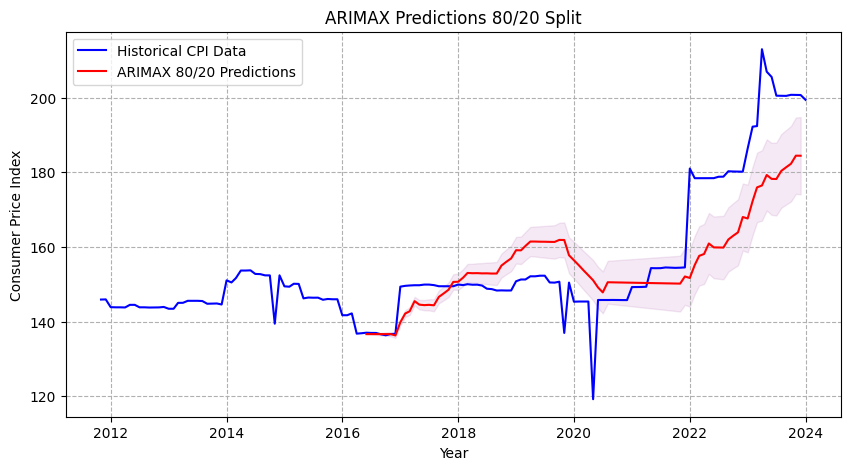

In [ ]:
start_date = '2016-06-01'
end_date = '2023-12-01'
start_date2 = '2011-11-01'
end_date2 = '2024-01-01'
filtered_data1 = merged_data.loc[start_date:end_date]
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical CPI Data', color='blue')
plt.plot(filtered_data1.index, filtered_data1['X_DIFF_PREDICTION_8020'], label='ARIMAX 80/20 Predictions', color='red')
num_points = len(filtered_data1['X_DIFF_PREDICTION_8020'])
dynamic_std_dev = np.linspace(0, filtered_data1['X_DIFF_PREDICTION_8020'].std() * 0.9, num_points)
plt.fill_between(filtered_data1.index,
                 filtered_data1['X_DIFF_PREDICTION_8020'] - dynamic_std_dev,
                 filtered_data1['X_DIFF_PREDICTION_8020'] + dynamic_std_dev,
                 color='purple', alpha=0.085)
plt.legend()
plt.title('ARIMAX Predictions 80/20 Split')
plt.grid(True, linestyle='--')
plt.ylabel('Consumer Price Index')
plt.xlabel('Year')
plt.show()

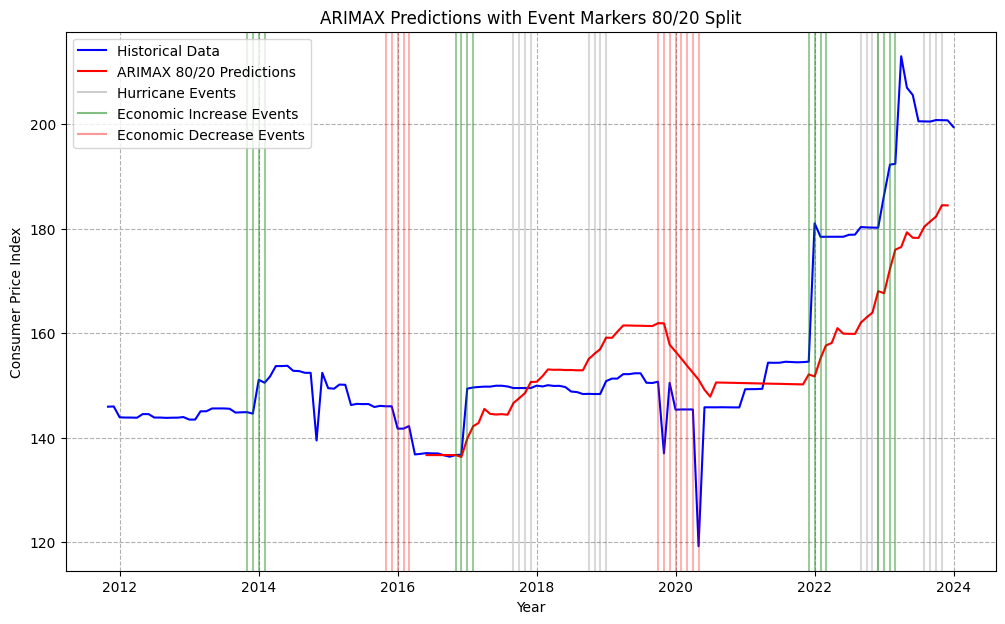

In [ ]:
start_date = '2016-06-01'
end_date = '2023-12-01'
start_date2 = '2011-11-01'
end_date2 = '2024-01-01'
filtered_data1 = merged_data.loc[start_date:end_date]
plt.figure(figsize=(12, 7))
ax = plt.gca()
ax.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical Data', color='blue')
ax.plot(filtered_data1.index, filtered_data1['X_DIFF_PREDICTION_8020'], label='80/20 Predictions', color='red')
ax.fill_between(filtered_data1.index,
                filtered_data1['X_DIFF_PREDICTION_8020'],
                filtered_data1['X_DIFF_PREDICTION_8020'],
                color='purple', alpha=0.085)
for x in merged_data.loc[start_date2:end_date2].query('hurricane==1').index:
    ax.axvline(x=x, color='k', alpha=0.15)
for x in merged_data.loc[start_date2:end_date2].query('economic==1').index:
    ax.axvline(x=x, color='green', alpha=0.4)
for x in merged_data.loc[start_date2:end_date2].query('economic2==1').index:
    ax.axvline(x=x, color='red', alpha=0.3)
ax.grid(True, linestyle='--')
hurricane_line = mlines.Line2D([], [], color='k', alpha=0.2, label='Hurricane Events')
economic_line = mlines.Line2D([], [], color='red', alpha=0.4, label='Economic Decrease Events')
economic_line2 = mlines.Line2D([], [], color='green', alpha=0.5, label='Economic Increase Events')
historical = mlines.Line2D([], [], color='blue', alpha=1, label='Historical Data')
predictions = mlines.Line2D([], [], color='red', alpha=1, label='ARIMAX 80/20 Predictions')
ax.legend(handles=[historical, predictions, hurricane_line, economic_line2, economic_line])
ax.set_title('ARIMAX Predictions with Event Markers 80/20 Split')
ax.set_ylabel('Consumer Price Index')
ax.set_xlabel('Year')
plt.show()

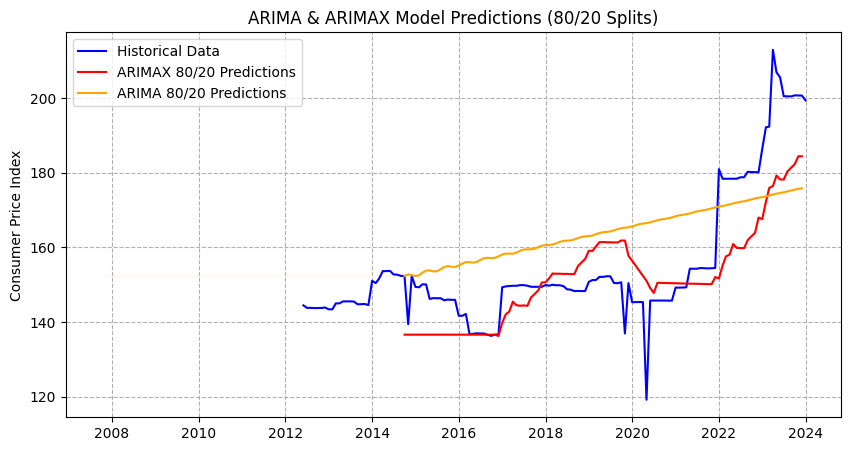

In [ ]:
start_date = '2014-10-01'
end_date = '2023-12-01'

start_date2 = '2012-06-01'
end_date2 = '2024-01-01'


filtered_data1 = merged_data.loc[start_date:end_date]
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical Data', color='blue')
plt.plot(filtered_data1.index, filtered_data1['X_DIFF_PREDICTION_8020'], label='ARIMAX 80/20 Predictions', color='red')
plt.fill_between(filtered_data1.index,
                 filtered_data1['X_DIFF_PREDICTION_8020'],
                 filtered_data1['X_DIFF_PREDICTION_8020'],
                 color='purple', alpha=0.085)
plt.plot(filtered_data1.index, filtered_data1['DIFF_PREDICTION_8020'], label='ARIMA 80/20 Predictions', color='orange')
plt.fill_between(filtered_data4.index,
                 filtered_data4['DIFF_PREDICTION_8020'],
                 filtered_data4['DIFF_PREDICTION_8020'],
                 color='orange', alpha=0.085)
plt.legend()
plt.title('ARIMA & ARIMAX Model Predictions (80/20 Splits)')
plt.grid(True, linestyle='--')
plt.ylabel('Consumer Price Index')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
test2['X_DIFF_PREDICTION_8020'] = merged_data['X_DIFF_PREDICTION_8020'].iloc[start:end+1]
error4 = mean_absolute_error(test2['Consumer_Price_Index'], test2['X_DIFF_PREDICTION_8020'])
error5 = mean_squared_error(test2['Consumer_Price_Index'], test2['X_DIFF_PREDICTION_8020'])
error6 = rmse(test2['Consumer_Price_Index'], test2['X_DIFF_PREDICTION_8020'])
mape2 = np.mean(np.abs((test2['Consumer_Price_Index'] - test2['X_DIFF_PREDICTION_8020']) / test2['Consumer_Price_Index'])) * 100

****

# **ARIMAX Metrics Evaluation (80/20 Split)**

****

In [ ]:
print(f'ARIMAX(0,0,1) 80/20 Split MAPE: {mape2}%')
print(f'ARIMAX(0,0,1) 80/20 Split MAE: {error4}')
print(f'ARIMAX(0,0,1) 80/20 Split MSE: {error5}')
print(f'ARIMAX(0,0,1) 80/20 Split RMSE: {error6}')

ARIMAX(0,0,1) 80/20 Split MAPE: 6.023974097098763%
ARIMAX(0,0,1) 80/20 Split MAE: 10.148793457534007
ARIMAX(0,0,1) 80/20 Split MSE: 170.6147617307977
ARIMAX(0,0,1) 80/20 Split RMSE: 13.061958571776199


****


### **Shortened Test Set to See Difference (ARIMAX 90/10 Split)**



****

In [ ]:
train3 = merged_data.iloc[:512]
test3 = merged_data.iloc[512:]

In [ ]:
train3['CPI_DIFF_1'].iloc[:10]

DATE
1979-12-01   -1.4
1980-01-01   -4.7
1980-02-01    7.0
1980-03-01    0.7
1980-04-01    4.6
1980-05-01    0.1
1980-06-01    0.1
1980-07-01    0.6
1980-08-01    0.1
1980-09-01    0.0
Freq: MS, Name: CPI_DIFF_1, dtype: float64

In [ ]:
test3['CPI_DIFF_1'].iloc[:10]

DATE
2022-08-01     0.025
2022-09-01     1.453
2022-10-01    -0.067
2022-11-01    -0.038
2022-12-01    -0.015
2023-01-01     6.232
2023-02-01     5.834
2023-03-01     0.153
2023-04-01    20.599
2023-05-01    -6.017
Freq: MS, Name: CPI_DIFF_1, dtype: float64

In [ ]:
exog_data5 = train3[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

exog_data6 = test3[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

In [ ]:
auto_arima(train3['CPI_DIFF_1'], exog=exog_data5,seasonal=True,error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  512
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1347.319
Date:                Sun, 21 Apr 2024   AIC                           2700.637
Time:                        14:13:08   BIC                           2713.352
Sample:                    12-01-1979   HQIC                          2705.621
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2643      0.157      1.689      0.091      -0.042       0.571
ar.L1         -0.2079      0.019    -10.909      0.000      -0.245      -0.171
sigma2        11.3020      0.187     60.540      0.000      10.936      11.668
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19494.46
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
CPI_diff_1 = train3['CPI_DIFF_1']

p_range = range(1, 3)
q_range = range(1, 3)

best_log_likelihood = -np.inf
best_aic = np.inf
best_bic = np.inf
best_p = 0
best_q = 0
best_model = None

for p in p_range:
    for q in q_range:
        try:
            model_arimax = ARIMA(CPI_diff_1, exog=exog_data5, order=(p, 0, q))
            results_arimax = model_arimax.fit()

            current_aic = results_arimax.aic
            current_bic = results_arimax.bic
            current_log_likelihood = results_arimax.llf

            if (current_log_likelihood > best_log_likelihood) or \
               (current_log_likelihood == best_log_likelihood and current_aic < best_aic) or \
               (current_log_likelihood == best_log_likelihood and current_aic == best_aic and current_bic < best_bic):
                best_log_likelihood = current_log_likelihood
                best_aic = current_aic
                best_bic = current_bic
                best_p = p
                best_q = q
                best_model = results_arimax

        except Exception as e:
            print(f"Could not fit ARIMAX({p},0,{q}) model: {e}")

if best_model:
    print(f"Best model ARIMAX({best_p},0,{best_q}) based on Log Likelihood, AIC, and BIC")
    print(best_model.summary())
else:
    print("No suitable model was found.")

Best model ARIMAX(2,0,2) based on Log Likelihood, AIC, and BIC
                               SARIMAX Results                                
Dep. Variable:             CPI_DIFF_1   No. Observations:                  512
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1321.314
Date:                Sun, 21 Apr 2024   AIC                           2678.628
Time:                        14:13:21   BIC                           2754.918
Sample:                    12-01-1979   HQIC                          2708.534
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0607      0.180      0.338      0.735      -0.291       0.413
hurricane           1.4058      0.847      1.661     

In [ ]:
model8 = ARIMA(train3['CPI_DIFF_1'], exog=exog_data5, order=(2,0,2))
diff_results3 = model8.fit()

****



# **Bonferroni and Benjamini-Hochberg Corrections of ARIMAX (2,0,2) P-Values**
# **[90/10 Split]**



****

In [ ]:
p_values = diff_results3.pvalues

names = diff_results3.params.index

bonferroni_results = multipletests(p_values, alpha=0.15, method='bonferroni')
print("Bonferroni Corrected p-values:")
for name, p_value, bf_corrected_p_value in zip(names, p_values, bonferroni_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bf_corrected_p_value:.6f}")

bh_results = multipletests(p_values, alpha=0.15, method='fdr_bh')
print("Benjamini-Hochberg Corrected p-values:")
for name, p_value, bh_corrected_p_value in zip(names, p_values, bh_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bh_corrected_p_value:.6f}")

df_results = pd.DataFrame({
    'ARIMAX (2,0,2) Coefficient': names,
    'Original P-Value': p_values,
    'Bonferroni Corrected P-Value': bonferroni_results[1],
    'BH Corrected P-Value': bh_results[1]
})

df_results

Bonferroni Corrected p-values:
const: original p-value = 0.735434, corrected p-value = 1.000000
hurricane: original p-value = 0.096787, corrected p-value = 1.000000
economic: original p-value = 0.030914, corrected p-value = 0.556444
economic2: original p-value = 0.066968, corrected p-value = 1.000000
economic2_lag_1: original p-value = 0.864533, corrected p-value = 1.000000
economic2_lag_2: original p-value = 0.829705, corrected p-value = 1.000000
economic2_lag_3: original p-value = 0.779796, corrected p-value = 1.000000
hurricane_lag_1: original p-value = 0.799961, corrected p-value = 1.000000
hurricane_lag_2: original p-value = 0.874461, corrected p-value = 1.000000
hurricane_lag_3: original p-value = 0.490749, corrected p-value = 1.000000
economic_lag_1: original p-value = 0.814809, corrected p-value = 1.000000
economic_lag_2: original p-value = 0.674661, corrected p-value = 1.000000
economic_lag_3: original p-value = 0.802137, corrected p-value = 1.000000
ar.L1: original p-value = 

ARIMAX (2,0,2) Coefficient  Original P-Value  \
const                                const      7.354339e-01   
hurricane                        hurricane      9.678677e-02   
economic                          economic      3.091355e-02   
economic2                        economic2      6.696763e-02   
economic2_lag_1            economic2_lag_1      8.645326e-01   
economic2_lag_2            economic2_lag_2      8.297049e-01   
economic2_lag_3            economic2_lag_3      7.797961e-01   
hurricane_lag_1            hurricane_lag_1      7.999613e-01   
hurricane_lag_2            hurricane_lag_2      8.744613e-01   
hurricane_lag_3            hurricane_lag_3      4.907494e-01   
economic_lag_1              economic_lag_1      8.148085e-01   
economic_lag_2              economic_lag_2      6.746615e-01   
economic_lag_3              economic_lag_3      8.021369e-01   
ar.L1                                ar.L1      9.588722e-01   
ar.L2                                ar.L2      8.866385e-01   
ma.L1                                ma.L1      9.970273e-01   
ma.L2                                ma.L2      9.858917e-01   
sigma2                              sigma2     2.100741e-157   

                 Bonferroni Corrected P-Value  BH Corrected P-Value  
const                            1.000000e+00          9.970273e-01  
hurricane                        1.000000e+00          4.355405e-01  
economic                         5.564440e-01          2.782220e-01  
economic2                        1.000000e+00          4.018058e-01  
economic2_lag_1                  1.000000e+00          9.970273e-01  
economic2_lag_2                  1.000000e+00          9.970273e-01  
economic2_lag_3                  1.000000e+00          9.970273e-01  
hurricane_lag_1                  1.000000e+00          9.970273e-01  
hurricane_lag_2                  1.000000e+00          9.970273e-01  
hurricane_lag_3                  1.000000e+00          9.970273e-01  
economic_lag_1                   1.000000e+00          9.970273e-01  
economic_lag_2                   1.000000e+00          9.970273e-01  
economic_lag_3                   1.000000e+00          9.970273e-01  
ar.L1                            1.000000e+00          9.970273e-01  
ar.L2                            1.000000e+00          9.970273e-01  
ma.L1                            1.000000e+00          9.970273e-01  
ma.L2                            1.000000e+00          9.970273e-01  
sigma2                          3.781333e-156         3.781333e-156

In [ ]:
start = len(train3)
end = len(train3) + len(test3) - 1
differenced_predictions = diff_results3.predict(start=start, end=end, exog=exog_data6).rename('X_DIFF_PREDICTION_9010')

In [ ]:
last_train_value = train3['Consumer_Price_Index'].iloc[-1]
merged_data['X_DIFF_PREDICTION_9010'] = last_train_value
merged_data['X_DIFF_PREDICTION_9010'].iloc[start:end+1] += differenced_predictions.cumsum()

In [ ]:
merged_data[['Consumer_Price_Index', 'X_DIFF_PREDICTION_9010']].iloc[512:]

Consumer_Price_Index  X_DIFF_PREDICTION_9010
DATE                                                    
2022-08-01               178.830              178.758164
2022-09-01               180.283              180.237546
2022-10-01               180.216              181.260472
2022-11-01               180.178              181.911040
2022-12-01               180.163              186.279605
2023-01-01               186.395              189.621255
2023-02-01               192.229              193.939913
2023-03-01               192.382              198.288954
2023-04-01               212.981              198.922379
2023-05-01               206.964              199.176752
2023-06-01               205.549              198.902060
2023-07-01               200.525              198.962739
2023-08-01               200.493              200.429239
2023-09-01               200.478              201.447660
2023-10-01               200.762              202.100375
2023-11-01               200.731              203.803412
2023-12-01               200.712              204.100626
2024-01-01               199.415              204.845921

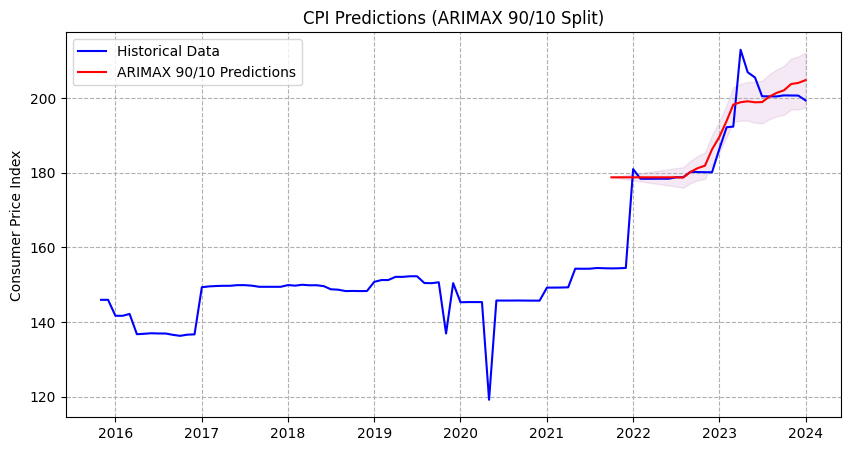

In [ ]:
start_date = '2021-10-01'
end_date = '2024-01-01'
filtered_data1 = merged_data.loc[start_date:end_date]

start_date2 = '2015-11-01'
end_date2 = '2024-01-01'


plt.figure(figsize=(10, 5))
plt.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical Data', color='blue')
plt.plot(filtered_data1.index, filtered_data1['X_DIFF_PREDICTION_9010'], label='ARIMAX 90/10 Predictions', color='red')
num_points = len(filtered_data1['X_DIFF_PREDICTION_9010'])
dynamic_std_dev = np.linspace(0, filtered_data1['X_DIFF_PREDICTION_9010'].std() * 0.7, num_points)
plt.fill_between(filtered_data1.index,
                 filtered_data1['X_DIFF_PREDICTION_9010'] - dynamic_std_dev,
                 filtered_data1['X_DIFF_PREDICTION_9010'] + dynamic_std_dev,
                 color='purple', alpha=0.085)
plt.legend()
plt.title('CPI Predictions (ARIMAX 90/10 Split)')
plt.grid(True, linestyle='--')
plt.ylabel("Consumer Price Index")
plt.show()

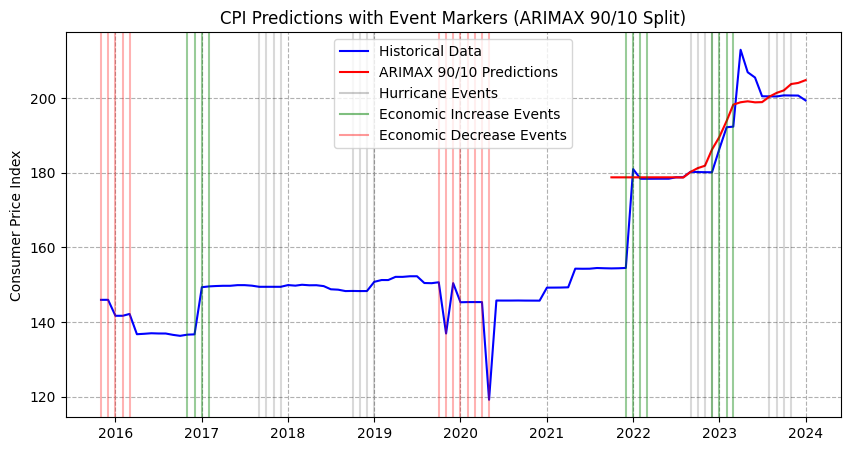

In [ ]:
start_date = '2021-10-01'
end_date = '2024-01-01'
filtered_data1 = merged_data.loc[start_date:end_date]
start_date2 = '2015-11-01'
end_date2 = '2024-01-01'
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical Data', color='blue')
ax.plot(filtered_data1.index, filtered_data1['X_DIFF_PREDICTION_9010'], label='ARIMA 90/10 Predictions', color='red')
ax.fill_between(filtered_data1.index,
                 filtered_data1['X_DIFF_PREDICTION_9010'],
                 filtered_data1['X_DIFF_PREDICTION_9010'],
                 color='purple', alpha=0.085)
for x in merged_data.loc[start_date2:end_date2].query('hurricane==1').index:
    ax.axvline(x=x, color='k', alpha=0.15)
for x in merged_data.loc[start_date2:end_date2].query('economic==1').index:
    ax.axvline(x=x, color='green', alpha=0.4)
for x in merged_data.loc[start_date2:end_date2].query('economic2==1').index:
    ax.axvline(x=x, color='red', alpha=0.3)
ax.grid(True, linestyle='--')
hurricane_line = mlines.Line2D([], [], color='k', alpha=0.2, label='Hurricane Events')
economic_line = mlines.Line2D([], [], color='red', alpha=0.4, label='Economic Decrease Events')
economic_line2 = mlines.Line2D([], [], color='green', alpha=0.5, label='Economic Increase Events')
historical = mlines.Line2D([], [], color='blue', alpha=1, label='Historical Data')
predictions = mlines.Line2D([], [], color='red', alpha=1, label='ARIMAX 90/10 Predictions')
ax.legend(handles=[historical, predictions, hurricane_line, economic_line2, economic_line])
ax.set_title('CPI Predictions with Event Markers (ARIMAX 90/10 Split)')
ax.set_ylabel('Consumer Price Index')
plt.show()

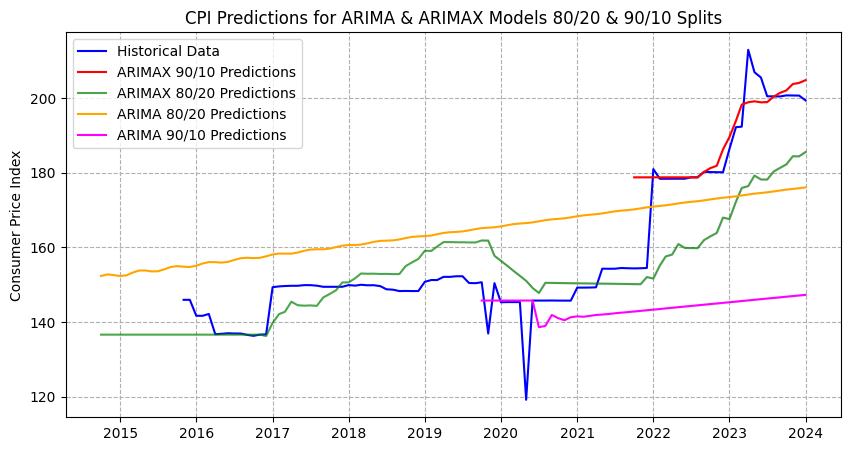

In [ ]:
start_date = '2021-10-01'
end_date = '2024-01-01'

start_date3 = '2019-10-01'
end_date3 = '2024-01-01'

start_date4 = '2014-10-01'
end_date4 = '2024-01-01'

start_date44 = '2021-10-01'
end_date44 = '2024-01-01'

filtered_data1 = merged_data.loc[start_date:end_date]
filtered_data8 = merged_data.loc[start_date3:end_date3]
filtered_data88 = merged_data.loc[start_date44:end_date44]
filtered_data9 = merged_data.loc[start_date4:end_date4]
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical Data', color='blue')
plt.plot(filtered_data88.index, filtered_data88['X_DIFF_PREDICTION_9010'], label='ARIMAX 90/10 Predictions', color='red')
plt.fill_between(filtered_data1.index,
                 filtered_data1['X_DIFF_PREDICTION_9010'],
                 filtered_data1['X_DIFF_PREDICTION_9010'],
                 color='purple', alpha=0.085)
filtered_data4 = merged_data.loc[start_date:end_date]
plt.plot(filtered_data9.index, filtered_data9['X_DIFF_PREDICTION_8020'], label='ARIMAX 80/20 Predictions', color='green', alpha=0.7)
plt.fill_between(filtered_data8.index,
                 filtered_data8['X_DIFF_PREDICTION_8020'],
                 filtered_data8['X_DIFF_PREDICTION_8020'],
                 color='purple', alpha=0.085)
plt.plot(filtered_data9.index, filtered_data9['DIFF_PREDICTION_8020'], label='ARIMA 80/20 Predictions', color='orange')
plt.fill_between(filtered_data4.index,
                 filtered_data4['DIFF_PREDICTION_8020'],
                 filtered_data4['DIFF_PREDICTION_8020'],
                 color='orange', alpha=0.085)
plt.plot(filtered_data8.index, filtered_data8['DIFF_PREDICTION_9010'], label='ARIMA 90/10 Predictions', color='magenta')
plt.fill_between(filtered_data4.index,
                 filtered_data4['DIFF_PREDICTION_9010'],
                 filtered_data4['DIFF_PREDICTION_9010'],
                 color='purple', alpha=0.085)
plt.legend()
plt.title('CPI Predictions for ARIMA & ARIMAX Models 80/20 & 90/10 Splits')
plt.grid(True, linestyle='--')
plt.ylabel('Consumer Price Index')
plt.show()

In [ ]:
test3['X_DIFF_PREDICTION_9010'] = merged_data['X_DIFF_PREDICTION_9010'].iloc[start:end+1]
error7 = mean_absolute_error(test3['Consumer_Price_Index'], test3['X_DIFF_PREDICTION_9010'])
error8 = mean_squared_error(test3['Consumer_Price_Index'], test3['X_DIFF_PREDICTION_9010'])
error9 = rmse(test3['Consumer_Price_Index'], test3['X_DIFF_PREDICTION_9010'])
mape3 = np.mean(np.abs((test3['Consumer_Price_Index'] - test3['X_DIFF_PREDICTION_9010']) / test3['Consumer_Price_Index'])) * 100

****

# **ARIMAX Metrics Evaluation (90/10 Split)**

****

In [ ]:
print(f'ARIMAX(2,0,2) 90/10 Split MAPE: {mape3}%')
print(f'ARIMAX(2,0,2) 90/10 Split MAE: {error7}')
print(f'ARIMAX(2,0,2) 90/10 Split MSE: {error8}')
print(f'ARIMAX(2,0,2) 90/10 Split RMSE: {error9}')

ARIMAX(2,0,2) 90/10 Split MAPE: 1.7885536747405832%
ARIMAX(2,0,2) 90/10 Split MAE: 3.5652419025545155
ARIMAX(2,0,2) 90/10 Split MSE: 24.877998045713145
ARIMAX(2,0,2) 90/10 Split RMSE: 4.987784883664606


****


### **Increased Test Set to See Difference (ARIMAX 70/30 Split)**



****

In [ ]:
train8888 = merged_data.iloc[:375]
test8888 = merged_data.iloc[375:]

In [ ]:
train8888['CPI_DIFF_1'].iloc[:10]

DATE
1979-12-01   -1.4
1980-01-01   -4.7
1980-02-01    7.0
1980-03-01    0.7
1980-04-01    4.6
1980-05-01    0.1
1980-06-01    0.1
1980-07-01    0.6
1980-08-01    0.1
1980-09-01    0.0
Freq: MS, Name: CPI_DIFF_1, dtype: float64

In [ ]:
test8888['CPI_DIFF_1'].iloc[:10]

DATE
2011-03-01   -0.210
2011-04-01    1.614
2011-05-01    0.347
2011-06-01    0.461
2011-07-01   -0.165
2011-08-01   -0.113
2011-09-01   -0.282
2011-10-01   -0.094
2011-11-01   -0.042
2011-12-01    0.040
Freq: MS, Name: CPI_DIFF_1, dtype: float64

In [ ]:
exog_data5 = train8888[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

exog_data6 = test8888[[
    'hurricane', 'economic', 'economic2',
    'economic2_lag_1', 'economic2_lag_2', 'economic2_lag_3',
    'hurricane_lag_1', 'hurricane_lag_2', 'hurricane_lag_3',
    'economic_lag_1', 'economic_lag_2', 'economic_lag_3'
]]

In [ ]:
auto_arima(train8888['CPI_DIFF_1'], exog=exog_data5,seasonal=True,error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  375
Model:                        SARIMAX   Log Likelihood                -914.444
Date:                Sun, 21 Apr 2024   AIC                           1832.887
Time:                        14:13:28   BIC                           1840.741
Sample:                    12-01-1979   HQIC                          1836.005
                         - 02-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2064      0.155      1.331      0.183      -0.097       0.510
sigma2         7.6841      0.137     56.169      0.000       7.416       7.952
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             22295.67
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             2.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
CPI_diff_1 = train8888['CPI_DIFF_1']

p_range = range(1, 3)
d_range = range(0, 2)
q_range = range(1, 3)

best_log_likelihood = -np.inf
best_aic = np.inf
best_bic = np.inf
best_p = 0
best_d = 0
best_q = 0
best_model = None

for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model_arima = ARIMA(CPI_diff_1, exog=exog_data5, order=(p, 0, q))
                results_arima = model_arima.fit()

                current_aic = results_arima.aic
                current_bic = results_arima.bic
                current_log_likelihood = results_arima.llf

                if (current_log_likelihood > best_log_likelihood) or \
                   (current_log_likelihood == best_log_likelihood and current_aic < best_aic) or \
                   (current_log_likelihood == best_log_likelihood and current_aic == best_aic and current_bic < best_bic):
                    best_log_likelihood = current_log_likelihood
                    best_aic = current_aic
                    best_bic = current_bic
                    best_p = p
                    best_d = d
                    best_q = q
                    best_model = results_arima

            except Exception as e:
                print(f"Could not fit ARIMA({p},{d},{q}) model: {e}")

if best_model:
    print(f"Best model ARIMA({best_p},{best_d},{best_q}) based on Log Likelihood, AIC, and BIC")
    print(best_model.summary())
else:
    print("No suitable model was found.")

Best model ARIMA(2,0,2) based on Log Likelihood, AIC, and BIC
                               SARIMAX Results                                
Dep. Variable:             CPI_DIFF_1   No. Observations:                  375
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -891.444
Date:                Sun, 21 Apr 2024   AIC                           1818.889
Time:                        14:13:48   BIC                           1889.574
Sample:                    12-01-1979   HQIC                          1846.951
                         - 02-01-2011                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0038      0.144      0.026      0.979      -0.279       0.287
hurricane           2.3232      0.831      2.796      

In [ ]:
model5555 = ARIMA(train8888['CPI_DIFF_1'], exog=exog_data5, order=(2,0,2))
diff_results = model5555.fit()

****



# **Bonferroni and Benjamini-Hochberg Corrections of ARIMAX (2,0,2) P-Values**
# **[70/30 Split]**



****

In [ ]:
p_values = diff_results.pvalues

names = diff_results.params.index

bonferroni_results = multipletests(p_values, alpha=0.20, method='bonferroni')
print("Bonferroni Corrected p-values:")
for name, p_value, bf_corrected_p_value in zip(names, p_values, bonferroni_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bf_corrected_p_value:.6f}")

bh_results = multipletests(p_values, alpha=0.20, method='fdr_bh')
print("Benjamini-Hochberg Corrected p-values:")
for name, p_value, bh_corrected_p_value in zip(names, p_values, bh_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bh_corrected_p_value:.6f}")

df_results = pd.DataFrame({
    'ARIMAX (2,0,2) Coefficient': names,
    'Original P-Value': p_values,
    'Bonferroni Corrected P-Value': bonferroni_results[1],
    'BH Corrected P-Value': bh_results[1]
})

df_results

Bonferroni Corrected p-values:
const: original p-value = 0.979188, corrected p-value = 1.000000
hurricane: original p-value = 0.005169, corrected p-value = 0.093043
economic: original p-value = 0.051580, corrected p-value = 0.928445
economic2: original p-value = 0.928953, corrected p-value = 1.000000
economic2_lag_1: original p-value = 0.899204, corrected p-value = 1.000000
economic2_lag_2: original p-value = 0.106722, corrected p-value = 1.000000
economic2_lag_3: original p-value = 0.009800, corrected p-value = 0.176408
hurricane_lag_1: original p-value = 0.476067, corrected p-value = 1.000000
hurricane_lag_2: original p-value = 0.983235, corrected p-value = 1.000000
hurricane_lag_3: original p-value = 0.380560, corrected p-value = 1.000000
economic_lag_1: original p-value = 0.057849, corrected p-value = 1.000000
economic_lag_2: original p-value = 0.074386, corrected p-value = 1.000000
economic_lag_3: original p-value = 0.704024, corrected p-value = 1.000000
ar.L1: original p-value = 

ARIMAX (2,0,2) Coefficient  Original P-Value  \
const                                const      9.791879e-01   
hurricane                        hurricane      5.169067e-03   
economic                          economic      5.158030e-02   
economic2                        economic2      9.289532e-01   
economic2_lag_1            economic2_lag_1      8.992038e-01   
economic2_lag_2            economic2_lag_2      1.067224e-01   
economic2_lag_3            economic2_lag_3      9.800433e-03   
hurricane_lag_1            hurricane_lag_1      4.760667e-01   
hurricane_lag_2            hurricane_lag_2      9.832352e-01   
hurricane_lag_3            hurricane_lag_3      3.805598e-01   
economic_lag_1              economic_lag_1      5.784861e-02   
economic_lag_2              economic_lag_2      7.438614e-02   
economic_lag_3              economic_lag_3      7.040240e-01   
ar.L1                                ar.L1      9.664729e-01   
ar.L2                                ar.L2      1.577303e-25   
ma.L1                                ma.L1      9.116189e-01   
ma.L2                                ma.L2      4.163809e-20   
sigma2                              sigma2      5.345237e-32   

                 Bonferroni Corrected P-Value  BH Corrected P-Value  
const                            1.000000e+00          9.832352e-01  
hurricane                        9.304321e-02          2.326080e-02  
economic                         9.284455e-01          1.487536e-01  
economic2                        1.000000e+00          9.832352e-01  
economic2_lag_1                  1.000000e+00          9.832352e-01  
economic2_lag_2                  1.000000e+00          2.134448e-01  
economic2_lag_3                  1.764078e-01          3.528156e-02  
hurricane_lag_1                  1.000000e+00          7.790183e-01  
hurricane_lag_2                  1.000000e+00          9.832352e-01  
hurricane_lag_3                  1.000000e+00          6.850077e-01  
economic_lag_1                   1.000000e+00          1.487536e-01  
economic_lag_2                   1.000000e+00          1.673688e-01  
economic_lag_3                   1.000000e+00          9.832352e-01  
ar.L1                            1.000000e+00          9.832352e-01  
ar.L2                            2.839145e-24          1.419573e-24  
ma.L1                            1.000000e+00          9.832352e-01  
ma.L2                            7.494855e-19          2.498285e-19  
sigma2                           9.621427e-31          9.621427e-31

In [ ]:
start = len(train8888)
end = len(train8888) + len(test8888) - 1
differenced_predictions = diff_results.predict(start=start, end=end, exog=exog_data6).rename('X_DIFF_PREDICTION_7030')

In [ ]:
last_train_value = train8888['Consumer_Price_Index'].iloc[-1]
merged_data['X_DIFF_PREDICTION_7030'] = last_train_value
merged_data['X_DIFF_PREDICTION_7030'].iloc[start:end+1] += differenced_predictions.cumsum()

In [ ]:
merged_data[['Consumer_Price_Index', 'X_DIFF_PREDICTION_7030']].iloc[435:]

Consumer_Price_Index  X_DIFF_PREDICTION_7030
DATE                                                    
2016-03-01               142.192              151.112121
2016-04-01               136.762              149.070156
2016-05-01               136.873              147.441729
2016-06-01               137.019              150.171655
2016-07-01               136.958              150.225454
...                          ...                     ...
2023-09-01               200.478              194.393308
2023-10-01               200.762              195.208541
2023-11-01               200.731              197.198987
2023-12-01               200.712              196.862911
2024-01-01               199.415              197.997203

[95 rows x 2 columns]

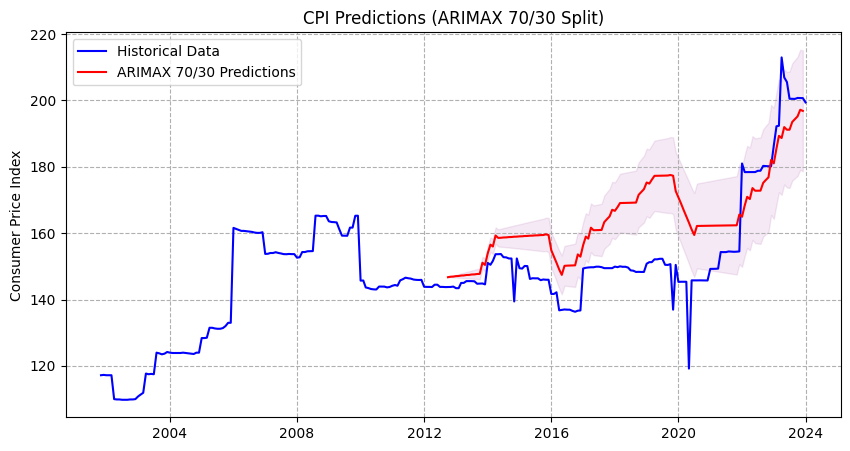

In [ ]:
start_date = '2012-10-01'
end_date = '2023-12-01'
start_date2 = '2001-11-01'
end_date2 = '2024-01-01'
filtered_data4 = merged_data.loc[start_date:end_date]
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical Data', color='blue')
plt.plot(filtered_data4.index, filtered_data4['X_DIFF_PREDICTION_7030'], label='ARIMAX 70/30 Predictions', color='red')
num_points = len(filtered_data4['X_DIFF_PREDICTION_7030'])
dynamic_std_dev = np.linspace(0, filtered_data4['X_DIFF_PREDICTION_7030'].std() * 1.5, num_points)
plt.fill_between(filtered_data4.index,
                 filtered_data4['X_DIFF_PREDICTION_7030'] - dynamic_std_dev,
                 filtered_data4['X_DIFF_PREDICTION_7030'] + dynamic_std_dev,
                 color='purple', alpha=0.085)
plt.legend()
plt.title('CPI Predictions (ARIMAX 70/30 Split)')
plt.grid(True, linestyle='--')
plt.ylabel('Consumer Price Index')
plt.show()

In [ ]:
test8888['X_DIFF_PREDICTION_7030'] = merged_data['X_DIFF_PREDICTION_7030'].iloc[start:end+1]
error4000 = mean_absolute_error(test8888['Consumer_Price_Index'], test8888['X_DIFF_PREDICTION_7030'])
error5000 = mean_squared_error(test8888['Consumer_Price_Index'], test8888['X_DIFF_PREDICTION_7030'])
error6000 = rmse(test8888['Consumer_Price_Index'], test8888['X_DIFF_PREDICTION_7030'])
mape2000 = np.mean(np.abs((test8888['Consumer_Price_Index'] - test8888['X_DIFF_PREDICTION_7030']) / test8888['Consumer_Price_Index'])) * 100

****


# **ARIMAX (70/30 Split) Metrics**

 ****

In [ ]:
print(f'ARIMAX(2,0,2) 70/30 Split MAPE: {mape2000}%')
print(f'ARIMAX(2,0,2) 70/30 Split MAE: {error4000}')
print(f'ARIMAX(2,0,2) 70/30 Split MSE: {error5000}')
print(f'ARIMAX(2,0,2) 70/30 Split RMSE: {error6000}')

ARIMAX(2,0,2) 70/30 Split MAPE: 7.350799724921687%
ARIMAX(2,0,2) 70/30 Split MAE: 11.033980632673238
ARIMAX(2,0,2) 70/30 Split MSE: 189.26141941620983
ARIMAX(2,0,2) 70/30 Split RMSE: 13.757231531678524


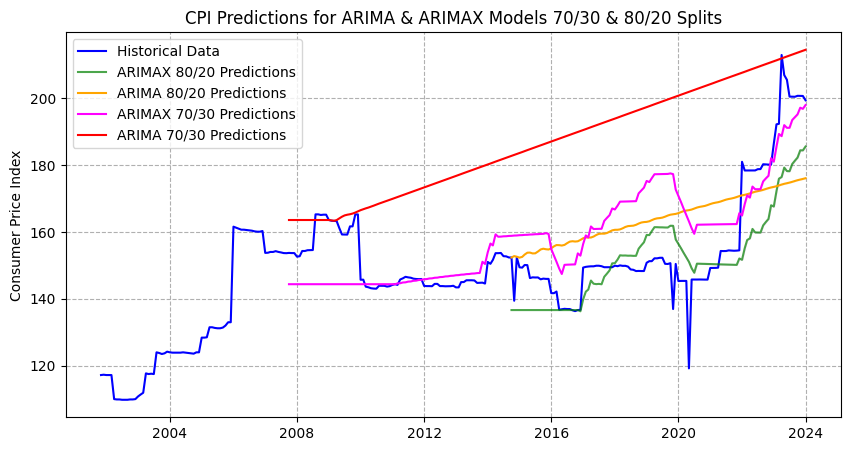

In [ ]:
start_date = '2021-10-01'
end_date = '2024-01-01'

start_date3 = '2019-10-01'
end_date3 = '2024-01-01'

start_date4 = '2014-10-01'
end_date4 = '2024-01-01'

start_date44 = '2021-10-01'
end_date44 = '2024-01-01'

start_date45 = '2007-10-01'
end_date45 = '2024-01-01'

filtered_data1 = merged_data.loc[start_date:end_date]
filtered_data8 = merged_data.loc[start_date3:end_date3]
filtered_data88 = merged_data.loc[start_date44:end_date44]
filtered_data9 = merged_data.loc[start_date4:end_date4]
filtered_data99 = merged_data.loc[start_date45:end_date45]
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Consumer_Price_Index'].loc[start_date2:end_date2], label='Historical Data', color='blue')
filtered_data4 = merged_data.loc[start_date:end_date]
plt.plot(filtered_data9.index, filtered_data9['X_DIFF_PREDICTION_8020'], label='ARIMAX 80/20 Predictions', color='green', alpha=0.7)
plt.fill_between(filtered_data8.index,
                 filtered_data8['X_DIFF_PREDICTION_8020'],
                 filtered_data8['X_DIFF_PREDICTION_8020'],
                 color='purple', alpha=0.085)
plt.plot(filtered_data9.index, filtered_data9['DIFF_PREDICTION_8020'], label='ARIMA 80/20 Predictions', color='orange')
plt.fill_between(filtered_data4.index,
                 filtered_data4['DIFF_PREDICTION_8020'],
                 filtered_data4['DIFF_PREDICTION_8020'],
                 color='orange', alpha=0.085)
plt.plot(filtered_data99.index, filtered_data99['X_DIFF_PREDICTION_7030'], label='ARIMAX 70/30 Predictions', color='magenta')
plt.fill_between(filtered_data4.index,
                 filtered_data4['X_DIFF_PREDICTION_7030'],
                 filtered_data4['X_DIFF_PREDICTION_7030'],
                 color='orange', alpha=0.085)
plt.plot(filtered_data99.index, filtered_data99['DIFF_PREDICTION_7030'], label='ARIMA 70/30 Predictions', color='red')
plt.fill_between(filtered_data4.index,
                 filtered_data4['DIFF_PREDICTION_7030'],
                 filtered_data4['DIFF_PREDICTION_7030'],
                 color='orange', alpha=0.085)
plt.legend()
plt.title('CPI Predictions for ARIMA & ARIMAX Models 70/30 & 80/20 Splits')
plt.grid(True, linestyle='--')
plt.ylabel('Consumer Price Index')
plt.show()

****

# **Comparison of ARIMAX 70/30, 80/20 & 90/10 Splits**


****

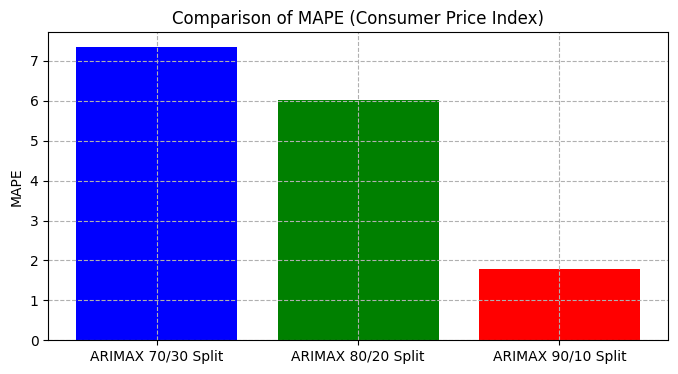

MAPE for ARIMAX 70/30 Split: 7.350799724921687
MAPE for ARIMAX 80/20 Split: 6.023974097098763
MAPE for ARIMAX 90/10 Split: 1.7885536747405832



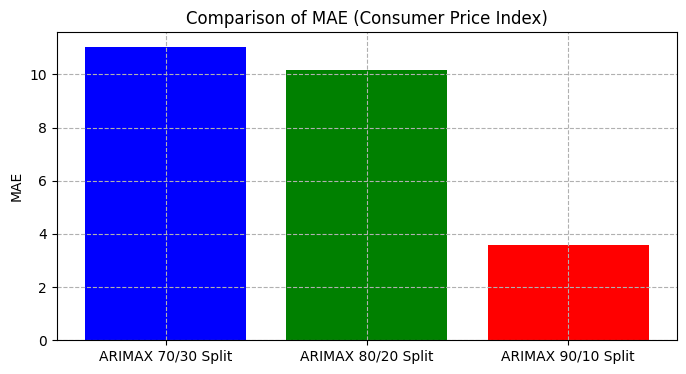

MAE for ARIMAX 70/30 Split: 11.033980632673238
MAE for ARIMAX 80/20 Split: 10.148793457534007
MAE for ARIMAX 90/10 Split: 3.5652419025545155



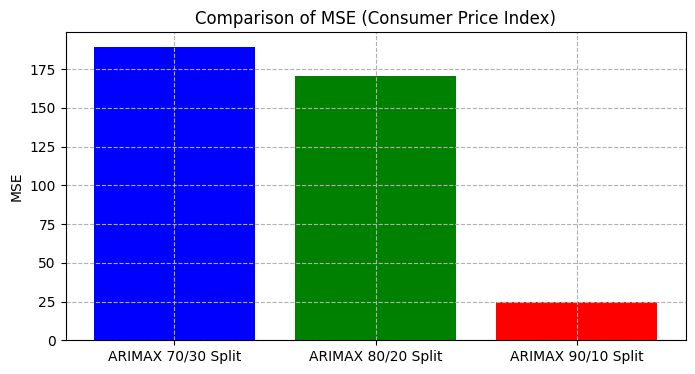

MSE for ARIMAX 70/30 Split: 189.26141941620983
MSE for ARIMAX 80/20 Split: 170.6147617307977
MSE for ARIMAX 90/10 Split: 24.877998045713145



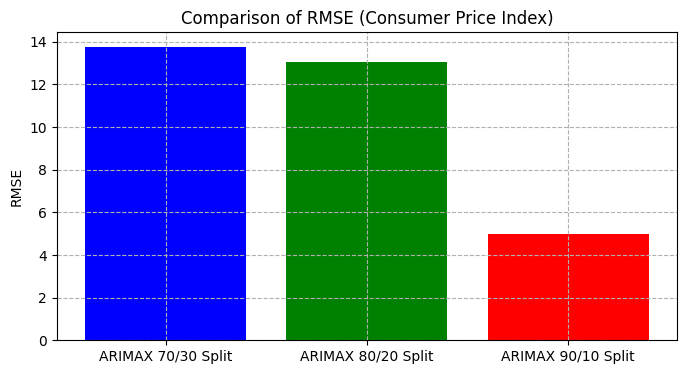

RMSE for ARIMAX 70/30 Split: 13.757231531678524
RMSE for ARIMAX 80/20 Split: 13.061958571776199
RMSE for ARIMAX 90/10 Split: 4.987784883664606



In [ ]:
arimax_metrics_7030 = {
    'MAPE': mape2000,
    'MAE': error4000,
    'MSE': error5000,
    'RMSE': error6000
}

arimax_metrics_8020 = {
    'MAPE': mape2,
    'MAE': error4,
    'MSE': error5,
    'RMSE': error6
}

arimax_metrics_9010 = {
    'MAPE': mape3,
    'MAE': error7,
    'MSE': error8,
    'RMSE': error9
}

for metric in arimax_metrics_8020.keys():
    plt.figure(figsize=(8, 4))
    plt.bar(['ARIMAX 70/30 Split', 'ARIMAX 80/20 Split', 'ARIMAX 90/10 Split'], [arimax_metrics_7030[metric], arimax_metrics_8020[metric], arimax_metrics_9010[metric]], color=['blue', 'green', 'red'])
    plt.title(f'Comparison of {metric} (Consumer Price Index)')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--')
    plt.show()

    print(f"{metric} for ARIMAX 70/30 Split: {arimax_metrics_7030[metric]}")
    print(f"{metric} for ARIMAX 80/20 Split: {arimax_metrics_8020[metric]}")
    print(f"{metric} for ARIMAX 90/10 Split: {arimax_metrics_9010[metric]}\n")


****


# **Comparison of ARIMA & ARIMAX 70/30 Split Metrics (Consumer Price Index)**


****

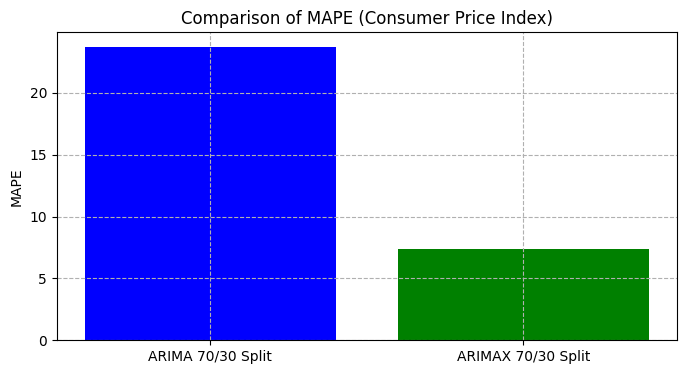

MAPE for ARIMA 70/30 Split: 23.710564477771214
MAPE for ARIMAX 70/30 Split: 7.350799724921687



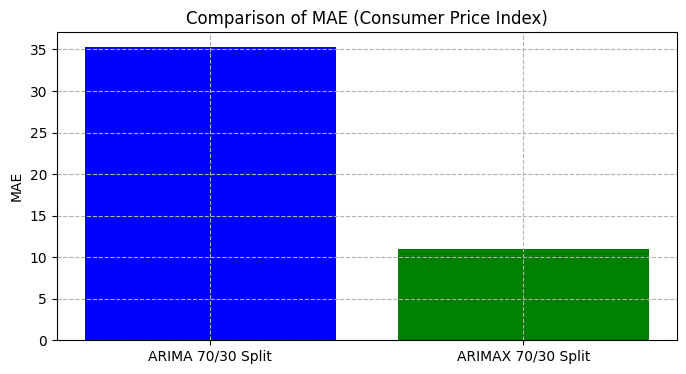

MAE for ARIMA 70/30 Split: 35.307359447699014
MAE for ARIMAX 70/30 Split: 11.033980632673238



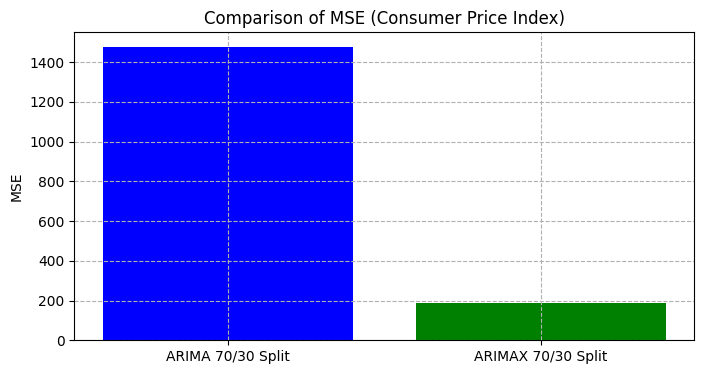

MSE for ARIMA 70/30 Split: 1475.9763838134863
MSE for ARIMAX 70/30 Split: 189.26141941620983



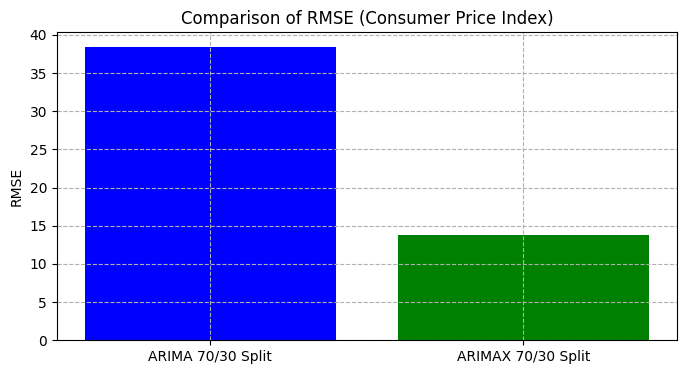

RMSE for ARIMA 70/30 Split: 38.41843807097689
RMSE for ARIMAX 70/30 Split: 13.757231531678524



In [ ]:
arima_metrics = {
    'MAPE': mape000,
    'MAE': error100,
    'MSE': error200,
    'RMSE': error300
}

arimax_metrics = {
    'MAPE': mape2000,
    'MAE': error4000,
    'MSE': error5000,
    'RMSE': error6000
}

for metric in arima_metrics.keys():
    plt.figure(figsize=(8, 4))
    plt.bar(['ARIMA 70/30 Split', 'ARIMAX 70/30 Split'], [arima_metrics[metric], arimax_metrics[metric]], color=['blue', 'green'])
    plt.title(f'Comparison of {metric} (Consumer Price Index)')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--')
    plt.show()

    print(f"{metric} for ARIMA 70/30 Split: {arima_metrics[metric]}")
    print(f"{metric} for ARIMAX 70/30 Split: {arimax_metrics[metric]}\n")

****


# **Comparison of ARIMA & ARIMAX 80/20 Split Metrics (Consumer Price Index)**


****

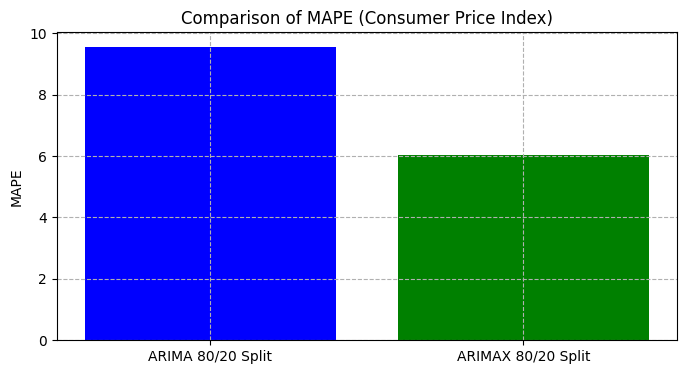

MAPE for ARIMA 80/20 Split: 9.549294808911446
MAPE for ARIMAX 80/20 Split: 6.023974097098763



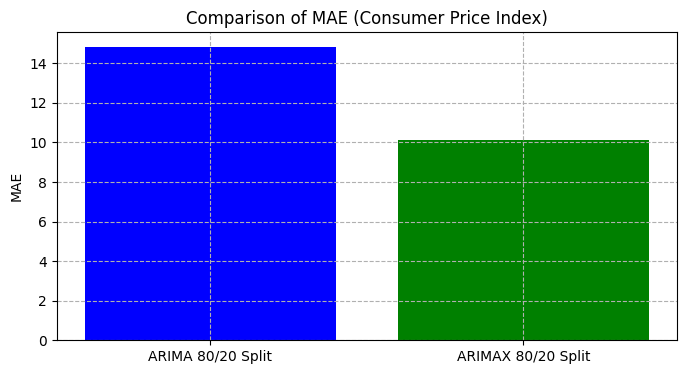

MAE for ARIMA 80/20 Split: 14.829141007567873
MAE for ARIMAX 80/20 Split: 10.148793457534007



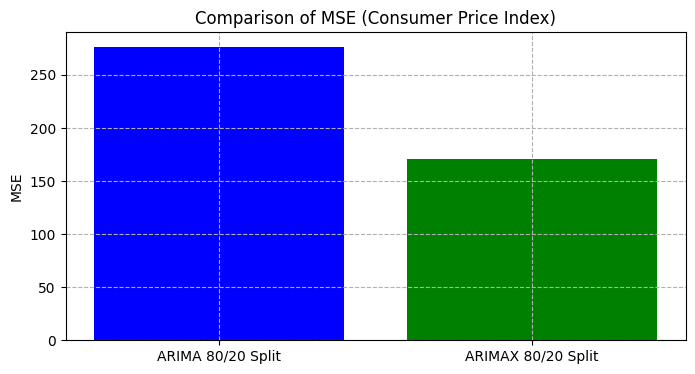

MSE for ARIMA 80/20 Split: 276.36842529360985
MSE for ARIMAX 80/20 Split: 170.6147617307977



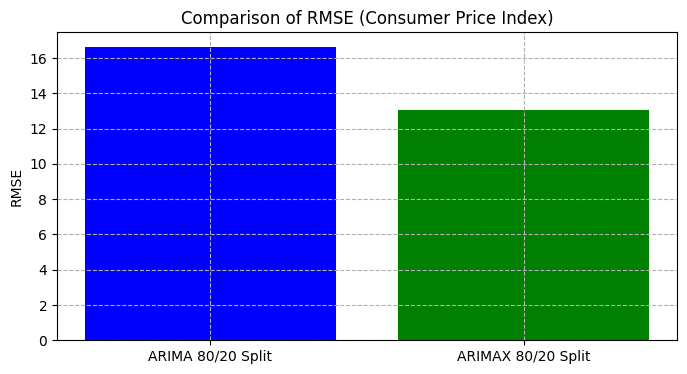

RMSE for ARIMA 80/20 Split: 16.624332326250276
RMSE for ARIMAX 80/20 Split: 13.061958571776199



In [ ]:
arima_metrics = {
    'MAPE': mape,
    'MAE': error1,
    'MSE': error2,
    'RMSE': error3
}

arimax_metrics = {
    'MAPE': mape2,
    'MAE': error4,
    'MSE': error5,
    'RMSE': error6
}

for key in arima_metrics.keys():
    if isinstance(arima_metrics[key], (list, np.ndarray)):
        if np.isnan(arima_metrics[key]).any():
            arima_metrics[key] = np.nanmean(arima_metrics[key])
        else:
            arima_metrics[key] = np.mean(arima_metrics[key])

for key in arimax_metrics.keys():
    if isinstance(arimax_metrics[key], (list, np.ndarray)):
        if np.isnan(arimax_metrics[key]).any():
            arimax_metrics[key] = np.nanmean(arimax_metrics[key])
        else:
            arimax_metrics[key] = np.mean(arimax_metrics[key])

for metric in arima_metrics.keys():
    plt.figure(figsize=(8, 4))
    plt.bar(['ARIMA 80/20 Split', 'ARIMAX 80/20 Split'], [arima_metrics[metric], arimax_metrics[metric]], color=['blue', 'green'])
    plt.title(f'Comparison of {metric} (Consumer Price Index)')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--')
    plt.show()

    print(f"{metric} for ARIMA 80/20 Split: {arima_metrics[metric]}")
    print(f"{metric} for ARIMAX 80/20 Split: {arimax_metrics[metric]}\n")

****


# **Comparison of ARIMA & ARIMAX 90/10 Split Metrics (Consumer Price Index)**


****

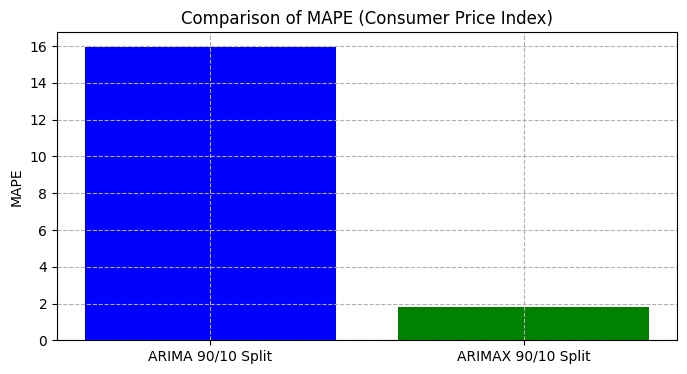

MAPE for ARIMA 90/10 Split: 15.951800920570165
MAPE for ARIMAX 90/10 Split: 1.7885536747405832



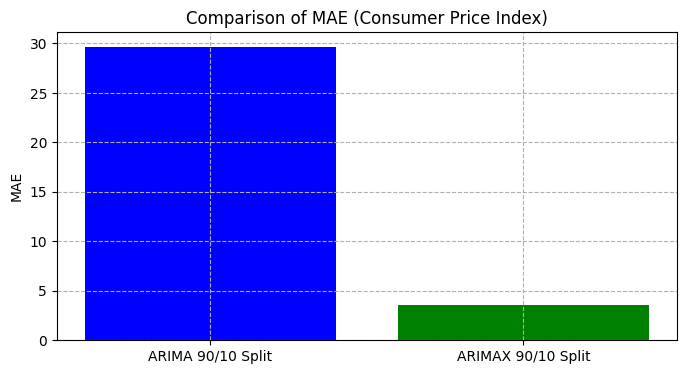

MAE for ARIMA 90/10 Split: 29.65075221334
MAE for ARIMAX 90/10 Split: 3.5652419025545155



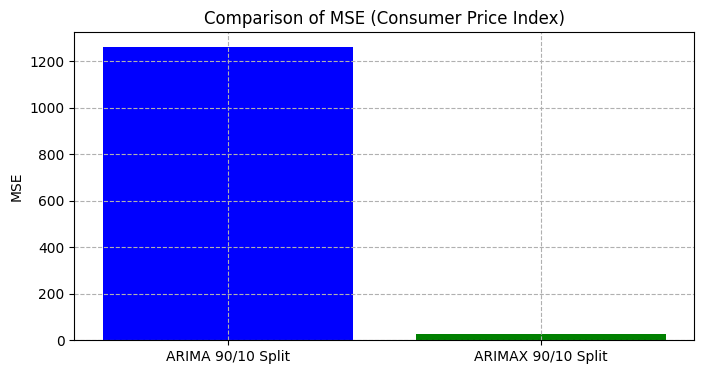

MSE for ARIMA 90/10 Split: 1260.7635433989572
MSE for ARIMAX 90/10 Split: 24.877998045713145



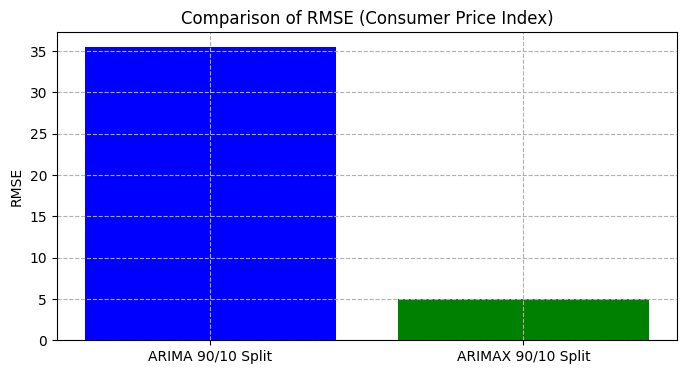

RMSE for ARIMA 90/10 Split: 35.50723226891892
RMSE for ARIMAX 90/10 Split: 4.987784883664606



In [ ]:
arima_metrics = {
    'MAPE': mape0,
    'MAE': error10,
    'MSE': error20,
    'RMSE': error30
}

arimax_metrics = {
    'MAPE': mape3,
    'MAE': error7,
    'MSE': error8,
    'RMSE': error9
}

for metric in arima_metrics.keys():
    plt.figure(figsize=(8, 4))
    plt.bar(['ARIMA 90/10 Split', 'ARIMAX 90/10 Split'], [arima_metrics[metric], arimax_metrics[metric]], color=['blue', 'green'])
    plt.title(f'Comparison of {metric} (Consumer Price Index)')
    plt.ylabel(metric)
    plt.grid(True, linestyle='--')
    plt.show()

    print(f"{metric} for ARIMA 90/10 Split: {arima_metrics[metric]}")
    print(f"{metric} for ARIMAX 90/10 Split: {arimax_metrics[metric]}\n")

****

# **Metrics suggest that the ARIMAX Model with Hurricane & Economic Events as Exogenous Variables performs better than ARIMA Model**

****

****


# **K-Fold Cross-Validation For ARIMAX (1,0,0) Model Using TimeSeriesSplit**

### **To help avoid overfitting and test the performance of the model on unseen data.**

$ \text{For } k = 9 \text{ folds in time series cross-validation:} $  
$ \text{1. Do NOT shuffle the dataset; the order of data is important.} $  
$ \text{2. Sequentially split the dataset into } k \text{ consecutive groups.} $  
$ \text{3. For each fold } i \text{ from } 1 \text{ to } k: $  
$ \quad \text{a. Take the first } i/k \text{ of the data as the training dataset.} $  
$ \quad \text{b. Take the following } 1/k \text{ of the data as the test dataset.} $  
$ \quad \text{c. Fit the model on the training dataset.} $  
$ \quad \text{d. Evaluate the model on the test dataset.} $  
$ \quad \text{e. Retain the evaluation score } S_i. $  
$ \text{4. Calculate the average of the evaluation scores: } \bar{S} = \frac{\sum_{i=1}^{k} S_i}{k} $




****

Fold 1:
  Mean Squared Error (MSE): 246.54813386875406
  Mean Absolute Error (MAE): 13.047222782925676
  Root Mean Squared Error (RMSE): 15.701851287945447
  Mean Absolute Percentage Error (MAPE): 17.411187680648624%



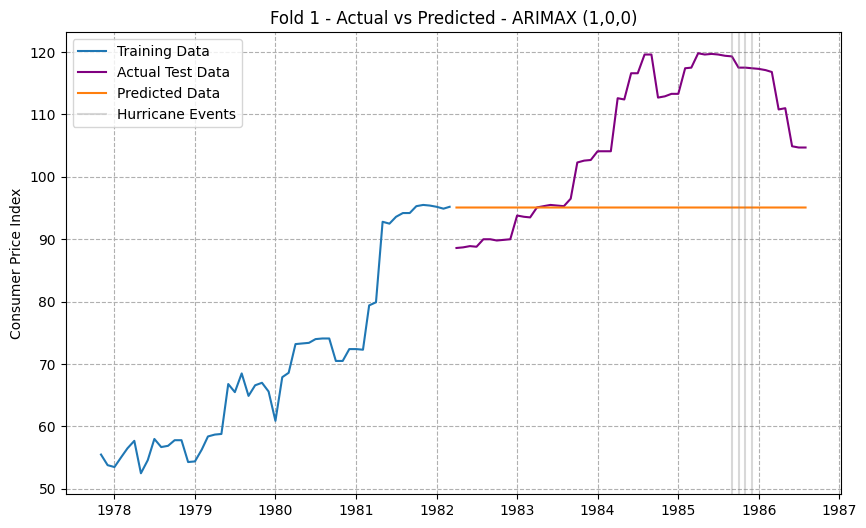

Fold 2:
  Mean Squared Error (MSE): 29.398761683493458
  Mean Absolute Error (MAE): 4.459437382657363
  Root Mean Squared Error (RMSE): 5.422062493506826
  Mean Absolute Percentage Error (MAPE): 2.7847750141695222%



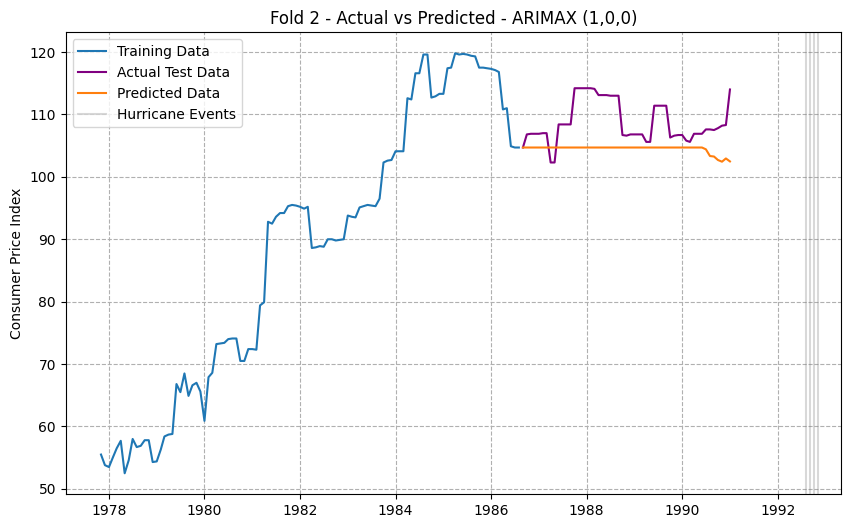

Fold 3:
  Mean Squared Error (MSE): 63.79350264664825
  Mean Absolute Error (MAE): 7.318100378616949
  Root Mean Squared Error (RMSE): 7.987083488148114
  Mean Absolute Percentage Error (MAPE): 8.263472806391219%



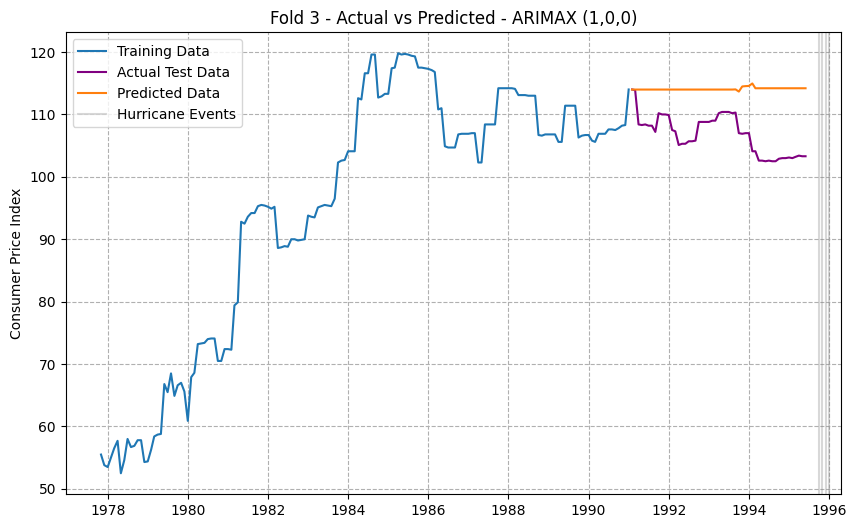

Fold 4:
  Mean Squared Error (MSE): 23.33068183314775
  Mean Absolute Error (MAE): 4.179977771788046
  Root Mean Squared Error (RMSE): 4.830184451255226
  Mean Absolute Percentage Error (MAPE): 2.9178772963778346%



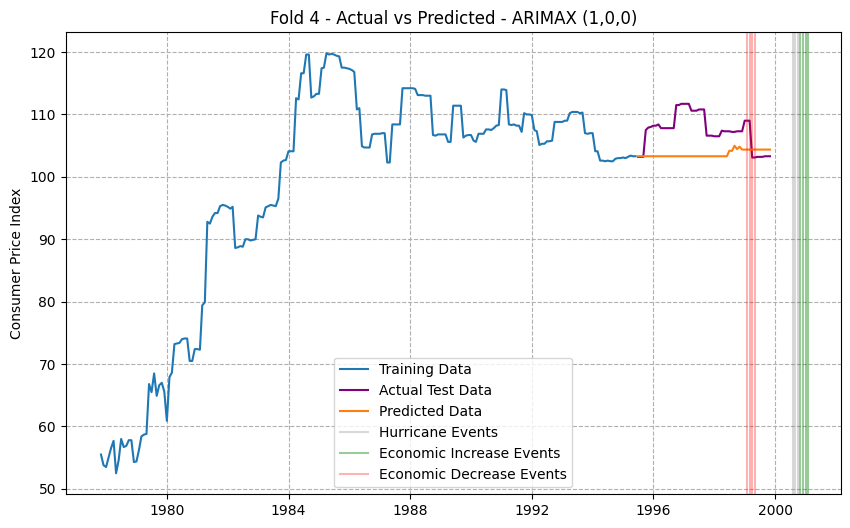

Fold 5:
  Mean Squared Error (MSE): 76.04226841101838
  Mean Absolute Error (MAE): 5.939877099964004
  Root Mean Squared Error (RMSE): 8.720221809737318
  Mean Absolute Percentage Error (MAPE): 8.063392091335952%



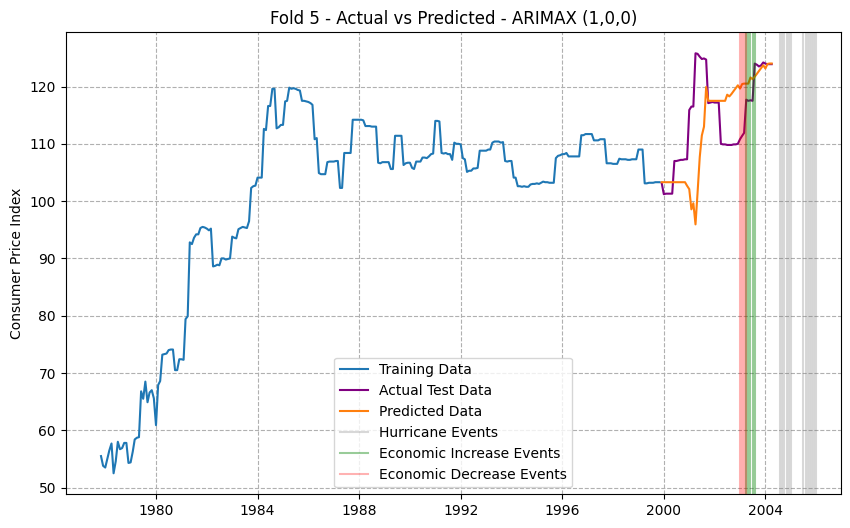

Fold 6:
  Mean Squared Error (MSE): 548.1252687384231
  Mean Absolute Error (MAE): 19.53933736491257
  Root Mean Squared Error (RMSE): 23.41207527619931
  Mean Absolute Percentage Error (MAPE): 20.605927216234356%



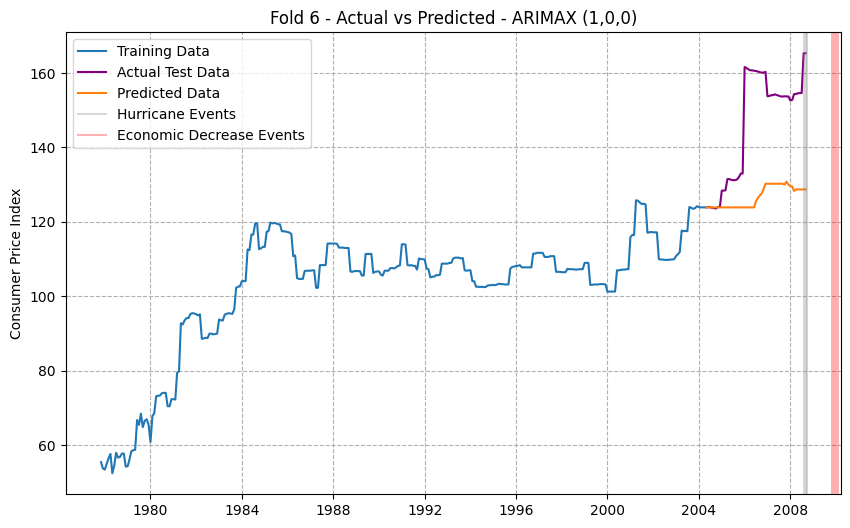

Fold 7:
  Mean Squared Error (MSE): 485.04609946445
  Mean Absolute Error (MAE): 18.830211896173573
  Root Mean Squared Error (RMSE): 22.023762155100794
  Mean Absolute Percentage Error (MAPE): 14.297238249418593%



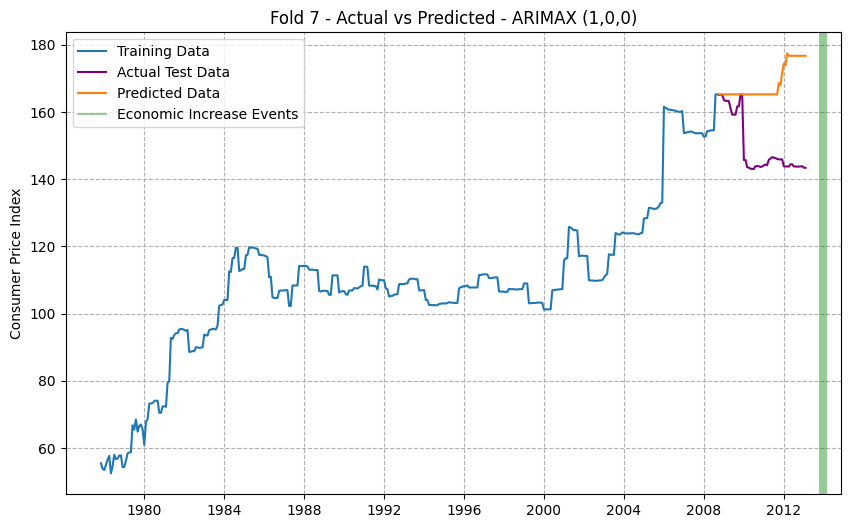

Fold 8:
  Mean Squared Error (MSE): 157.84837138469965
  Mean Absolute Error (MAE): 10.305970172037055
  Root Mean Squared Error (RMSE): 12.563772179751576
  Mean Absolute Percentage Error (MAPE): 2.1392434631141866%



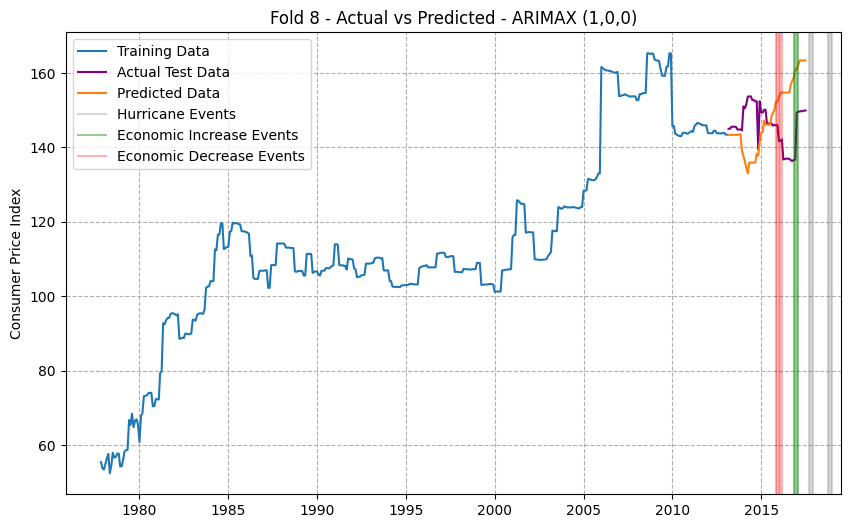

Fold 9:
  Mean Squared Error (MSE): 142.1435074085278
  Mean Absolute Error (MAE): 10.43429051708602
  Root Mean Squared Error (RMSE): 11.922395204342449
  Mean Absolute Percentage Error (MAPE): 6.682047603681476%



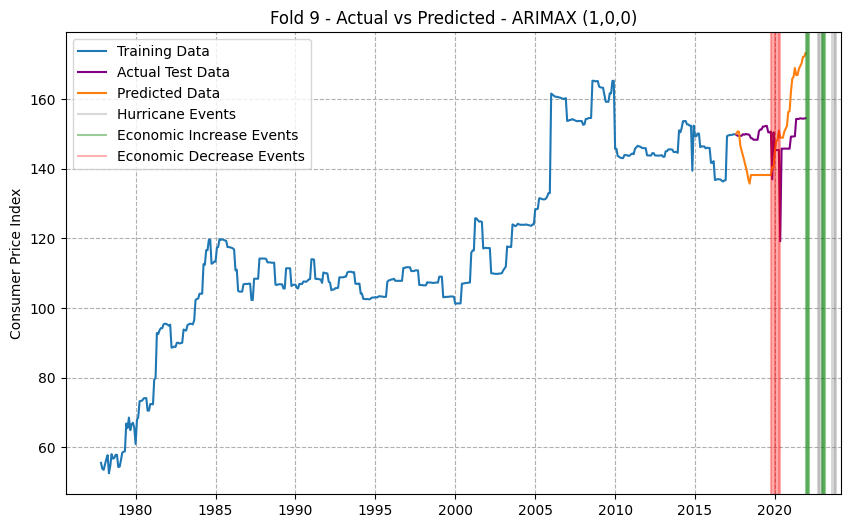

In [ ]:
CPI_series = merged_data['CPI_DIFF_1']

exog_data3 = merged_data[exog_data.columns]

tscv = TimeSeriesSplit(n_splits=9)
order = (1, 0, 0)
seasonal_order = (0, 0, 0, 12)

mse_per_fold, mae_per_fold, rmse_per_fold, mape_per_fold = [], [], [], []

for i, (train_index, test_index) in enumerate(tscv.split(CPI_series)):
    train, test = CPI_series.iloc[train_index], CPI_series.iloc[test_index]
    exog_train, exog_test = exog_data3.iloc[train_index], exog_data3.iloc[test_index]
    test_original = original_CPI.iloc[test_index]

    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, exog=exog_train,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    predictions_diff = model_fit.forecast(steps=len(test), exog=exog_test)
    cumulative_predictions = np.cumsum(predictions_diff) + original_CPI.iloc[train_index[-1]]

    mse = mean_squared_error(test_original, cumulative_predictions)
    mae = mean_absolute_error(test_original, cumulative_predictions)
    rmse_val = rmse(test_original, cumulative_predictions)
    mape_val = np.mean(np.abs((test_original - cumulative_predictions) / test_original.replace(0, np.nan))) * 100

    mse_per_fold.append(mse)
    mae_per_fold.append(mae)
    rmse_per_fold.append(rmse_val)
    mape_per_fold.append(mape_val)

    print(f'Fold {i+1}:')
    print(f'  Mean Squared Error (MSE): {mse:}')
    print(f'  Mean Absolute Error (MAE): {mae:}')
    print(f'  Root Mean Squared Error (RMSE): {rmse_val:}')
    print(f'  Mean Absolute Percentage Error (MAPE): {mape_val:}%\n')

    plt.figure(figsize=(10, 6))
    plt.plot(original_CPI.iloc[train_index], label='Training Data')
    plt.plot(test_original, label='Actual Test Data',  color='purple')
    plt.plot(test_original.index, cumulative_predictions, label='Predicted Data')

    label_hurricane_added = False
    label_economic_added = False
    label_economic_added2 = False

    for hurricane_time in merged_data.iloc[test_index].query('hurricane==1').index:
        if not label_hurricane_added:
            plt.axvline(x=hurricane_time, color='gray', label='Hurricane Events', alpha=0.3)
            label_hurricane_added = True
        else:
            plt.axvline(x=hurricane_time, color='gray', alpha=0.3)

    for economic_time in merged_data.iloc[test_index].query('economic==1').index:
        if not label_economic_added:
            plt.axvline(x=economic_time, color='green', label='Economic Increase Events', alpha=0.4)
            label_economic_added = True
        else:
            plt.axvline(x=economic_time, color='green', alpha=0.4)

    for economic_time2 in merged_data.iloc[test_index].query('economic2==1').index:
        if not label_economic_added2:
            plt.axvline(x=economic_time2, color='red', label='Economic Decrease Events', alpha=0.3)
            label_economic_added2 = True
        else:
            plt.axvline(x=economic_time2, color='red', alpha=0.3)

    plt.title(f'Fold {i+1} - ARIMAX (1,0,0)')
    plt.grid(True, linestyle='--')
    plt.ylabel('Consumer Price Index')
    plt.legend()
    plt.show()

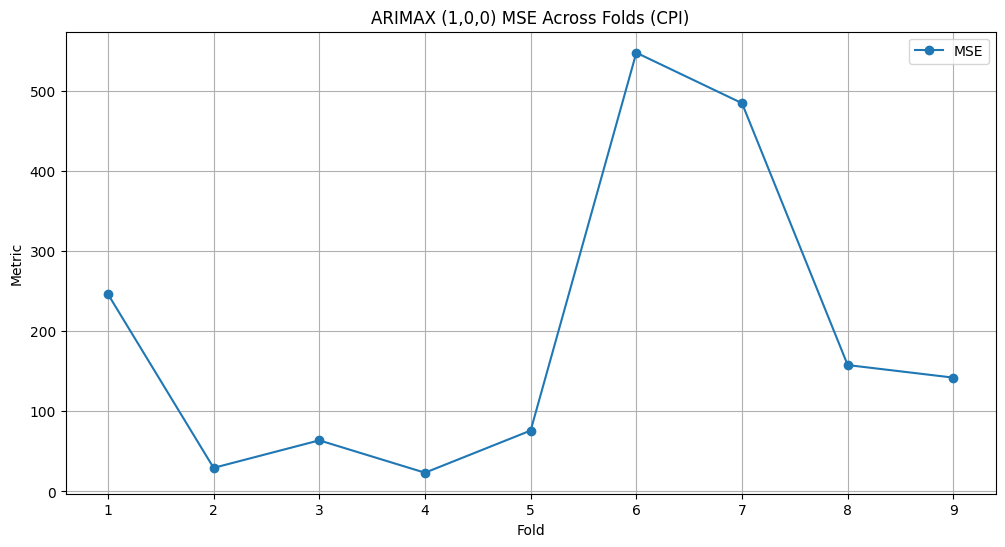

In [ ]:
folds = range(1, tscv.n_splits + 1)

plt.figure(figsize=(12, 6))
plt.plot(folds, mse_per_fold, label='MSE', marker='o')
plt.title('ARIMAX (1,0,0) MSE Across Folds (CPI)')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

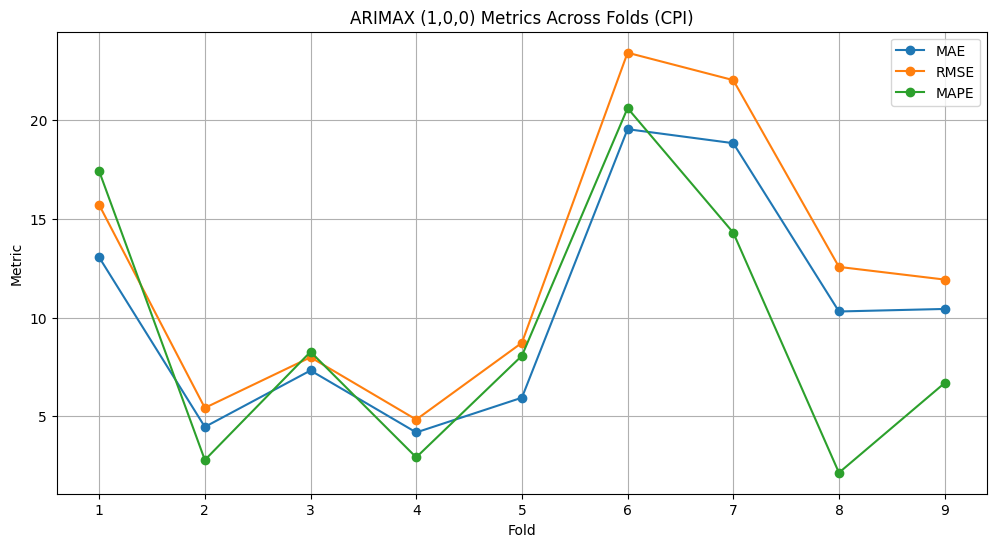

In [ ]:
folds = range(1, tscv.n_splits + 1)

plt.figure(figsize=(12, 6))
plt.plot(folds, mae_per_fold, label='MAE', marker='o')
plt.plot(folds, rmse_per_fold, label='RMSE', marker='o')
plt.plot(folds, mape_per_fold, label='MAPE', marker='o')
plt.title('ARIMAX (1,0,0) Metrics Across Folds (CPI)')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
average_mse = np.mean(mse_per_fold)
average_mae = np.mean(mae_per_fold)
average_rmse = np.mean(rmse_per_fold)
average_mape = np.mean(mape_per_fold)

print(f'ARIMAX (1,0,0) Average Mean Squared Error (MSE): {average_mse:}')
print(f'ARIMAX (1,0,0) Average Mean Absolute Error (MAE): {average_mae:}')
print(f'ARIMAX (1,0,0) Average Root Mean Squared Error (RMSE): {average_rmse:}')
print(f'ARIMAX (1,0,0) Average Mean Absolute Percentage Error (MAPE): {average_mape:}%')


ARIMAX (1,0,0) Average Mean Squared Error (MSE): 196.91962171546248
ARIMAX (1,0,0) Average Mean Absolute Error (MAE): 10.450491707351253
ARIMAX (1,0,0) Average Root Mean Squared Error (RMSE): 12.509267593998564
ARIMAX (1,0,0) Average Mean Absolute Percentage Error (MAPE): 9.240573491263529%


****


# **K-Fold Cross-Validation For ARIMAX (2,0,2) Model Using TimeSeriesSplit**


****

Fold 1:
  Mean Squared Error (MSE): 143.48152962902086
  Mean Absolute Error (MAE): 10.669267737650106
  Root Mean Squared Error (RMSE): 11.978377587512462
  Mean Absolute Percentage Error (MAPE): 12.68313841629797%



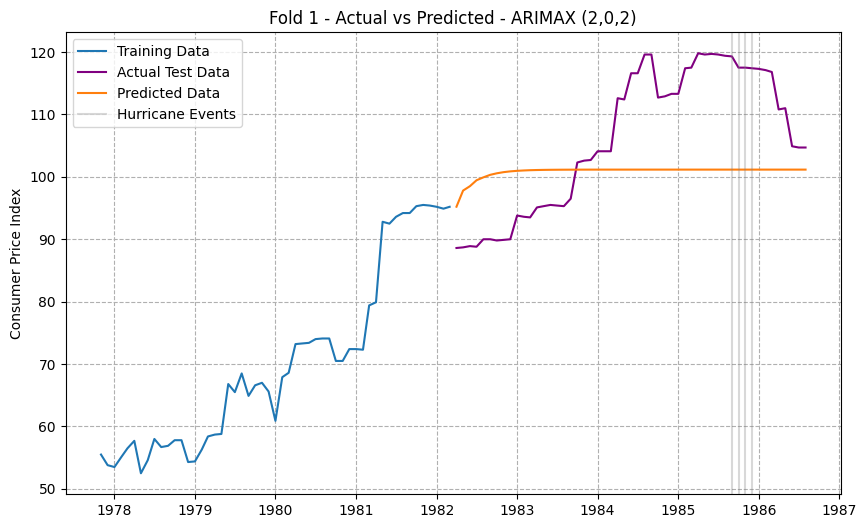

Fold 2:
  Mean Squared Error (MSE): 27.369797025630117
  Mean Absolute Error (MAE): 4.302107958397654
  Root Mean Squared Error (RMSE): 5.2316151450226265
  Mean Absolute Percentage Error (MAPE): 2.7985297580586983%



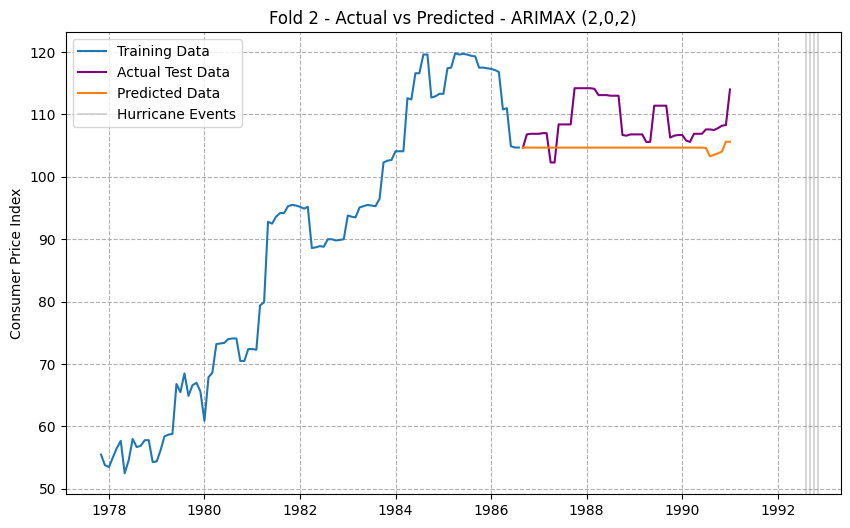

Fold 3:
  Mean Squared Error (MSE): 71.94619182005975
  Mean Absolute Error (MAE): 7.6880598596280745
  Root Mean Squared Error (RMSE): 8.482110104216979
  Mean Absolute Percentage Error (MAPE): 8.292509808329754%



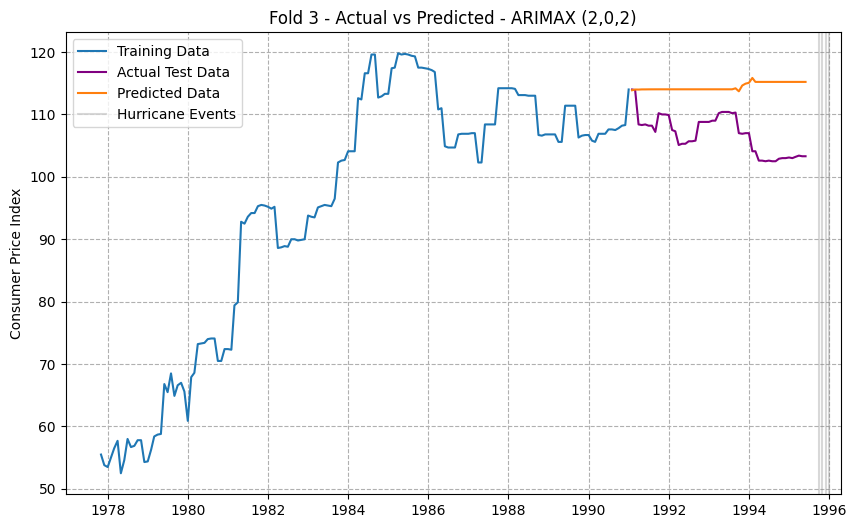

Fold 4:
  Mean Squared Error (MSE): 23.13023152808353
  Mean Absolute Error (MAE): 4.192593709447143
  Root Mean Squared Error (RMSE): 4.80938993304593
  Mean Absolute Percentage Error (MAPE): 2.9145548350998745%



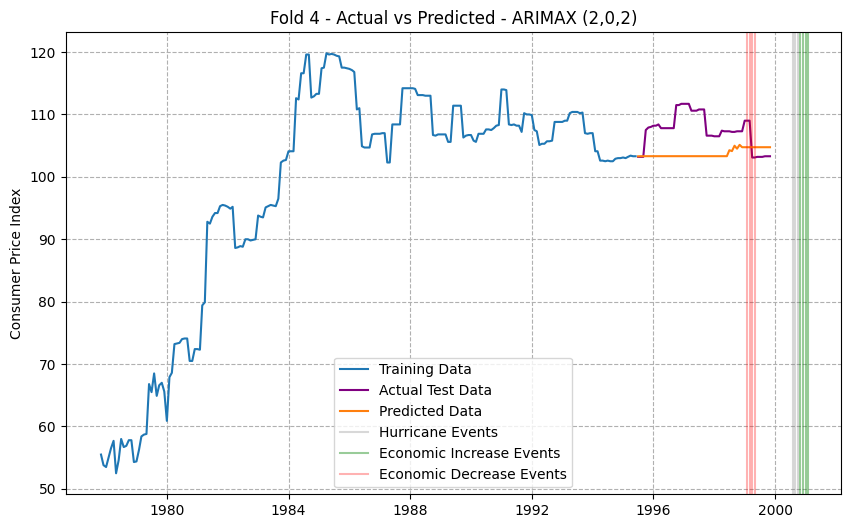

Fold 5:
  Mean Squared Error (MSE): 77.6334135015286
  Mean Absolute Error (MAE): 5.991767791603335
  Root Mean Squared Error (RMSE): 8.81098255029078
  Mean Absolute Percentage Error (MAPE): 8.86290530887592%



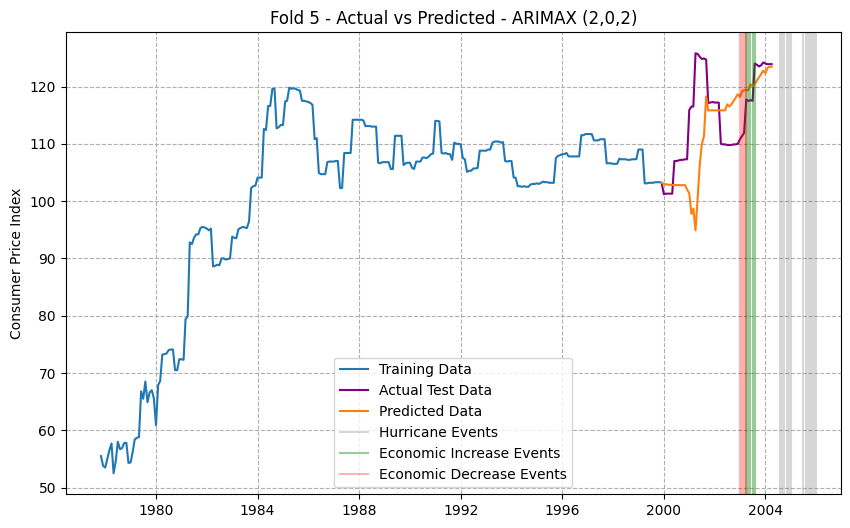

Fold 6:
  Mean Squared Error (MSE): 793.7870644546547
  Mean Absolute Error (MAE): 24.16766457546808
  Root Mean Squared Error (RMSE): 28.174226953984995
  Mean Absolute Percentage Error (MAPE): 22.570457474616315%



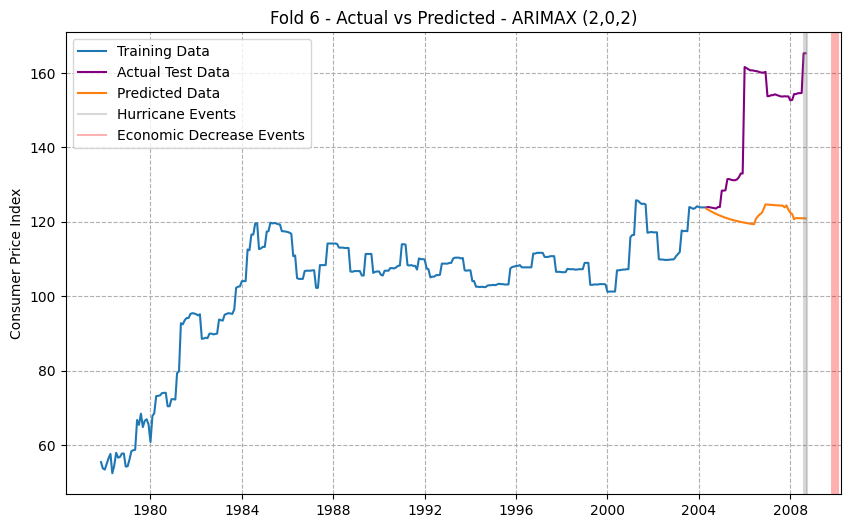

Fold 7:
  Mean Squared Error (MSE): 628.0071115501745
  Mean Absolute Error (MAE): 21.816077320301467
  Root Mean Squared Error (RMSE): 25.060070062754704
  Mean Absolute Percentage Error (MAPE): 15.874554555822007%



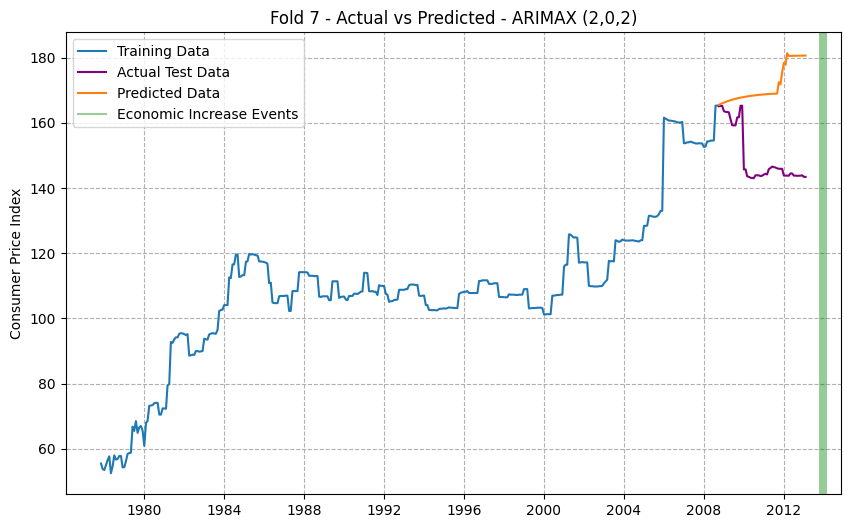

Fold 8:
  Mean Squared Error (MSE): 150.61086947949053
  Mean Absolute Error (MAE): 9.883084978707089
  Root Mean Squared Error (RMSE): 12.272362017129813
  Mean Absolute Percentage Error (MAPE): 1.5429632840484462%



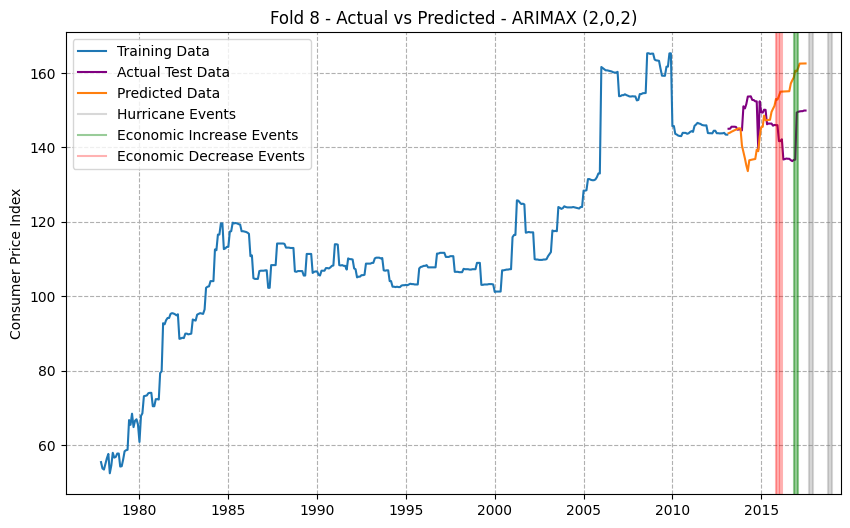

Fold 9:
  Mean Squared Error (MSE): 138.70769568682985
  Mean Absolute Error (MAE): 10.40702478817189
  Root Mean Squared Error (RMSE): 11.777423134405499
  Mean Absolute Percentage Error (MAPE): 5.903774899235229%



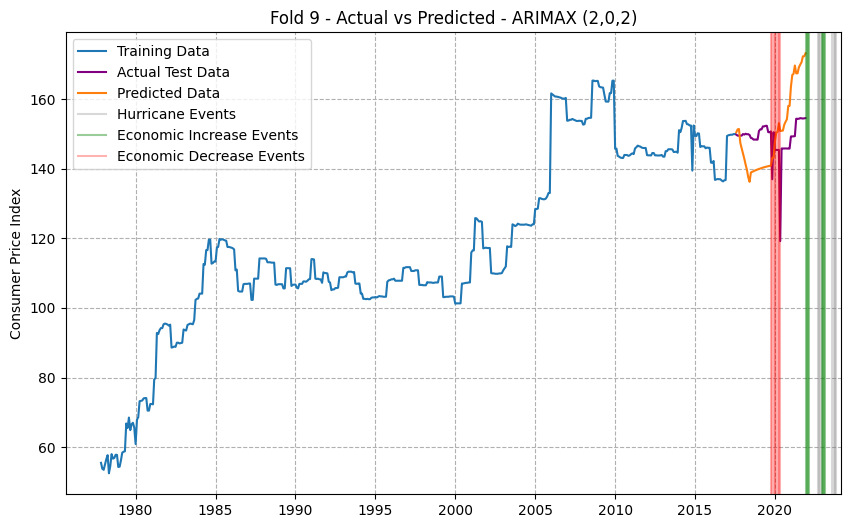

In [ ]:
CPI_series = merged_data['CPI_DIFF_1']

exog_data3 = merged_data[exog_data.columns]

tscv = TimeSeriesSplit(n_splits=9)
order = (2, 0, 2)
seasonal_order = (0, 0, 0, 12)

mse_per_fold, mae_per_fold, rmse_per_fold, mape_per_fold = [], [], [], []

for i, (train_index, test_index) in enumerate(tscv.split(CPI_series)):
    train, test = CPI_series.iloc[train_index], CPI_series.iloc[test_index]
    exog_train, exog_test = exog_data3.iloc[train_index], exog_data3.iloc[test_index]
    test_original = original_CPI.iloc[test_index]

    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, exog=exog_train,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    predictions_diff = model_fit.forecast(steps=len(test), exog=exog_test)
    cumulative_predictions = np.cumsum(predictions_diff) + original_CPI.iloc[train_index[-1]]

    mse = mean_squared_error(test_original, cumulative_predictions)
    mae = mean_absolute_error(test_original, cumulative_predictions)
    rmse_val = rmse(test_original, cumulative_predictions)
    mape_val = np.mean(np.abs((test_original - cumulative_predictions) / test_original.replace(0, np.nan))) * 100

    mse_per_fold.append(mse)
    mae_per_fold.append(mae)
    rmse_per_fold.append(rmse_val)
    mape_per_fold.append(mape_val)

    print(f'Fold {i+1}:')
    print(f'  Mean Squared Error (MSE): {mse:}')
    print(f'  Mean Absolute Error (MAE): {mae:}')
    print(f'  Root Mean Squared Error (RMSE): {rmse_val:}')
    print(f'  Mean Absolute Percentage Error (MAPE): {mape_val:}%\n')

    plt.figure(figsize=(10, 6))
    plt.plot(original_CPI.iloc[train_index], label='Training Data')
    plt.plot(test_original, label='Actual Test Data',  color='purple')
    plt.plot(test_original.index, cumulative_predictions, label='Predicted Data')

    label_hurricane_added = False
    label_economic_added = False
    label_economic_added2 = False

    for hurricane_time in merged_data.iloc[test_index].query('hurricane==1').index:
        if not label_hurricane_added:
            plt.axvline(x=hurricane_time, color='gray', label='Hurricane Events', alpha=0.3)
            label_hurricane_added = True
        else:
            plt.axvline(x=hurricane_time, color='gray', alpha=0.3)

    for economic_time in merged_data.iloc[test_index].query('economic==1').index:
        if not label_economic_added:
            plt.axvline(x=economic_time, color='green', label='Economic Increase Events', alpha=0.4)
            label_economic_added = True
        else:
            plt.axvline(x=economic_time, color='green', alpha=0.4)

    for economic_time2 in merged_data.iloc[test_index].query('economic2==1').index:
        if not label_economic_added2:
            plt.axvline(x=economic_time2, color='red', label='Economic Decrease Events', alpha=0.3)
            label_economic_added2 = True
        else:
            plt.axvline(x=economic_time2, color='red', alpha=0.3)

    plt.title(f'Fold {i+1} - ARIMAX (2,0,2)')
    plt.grid(True, linestyle='--')
    plt.ylabel('Consumer Price Index')
    plt.legend()
    plt.show()

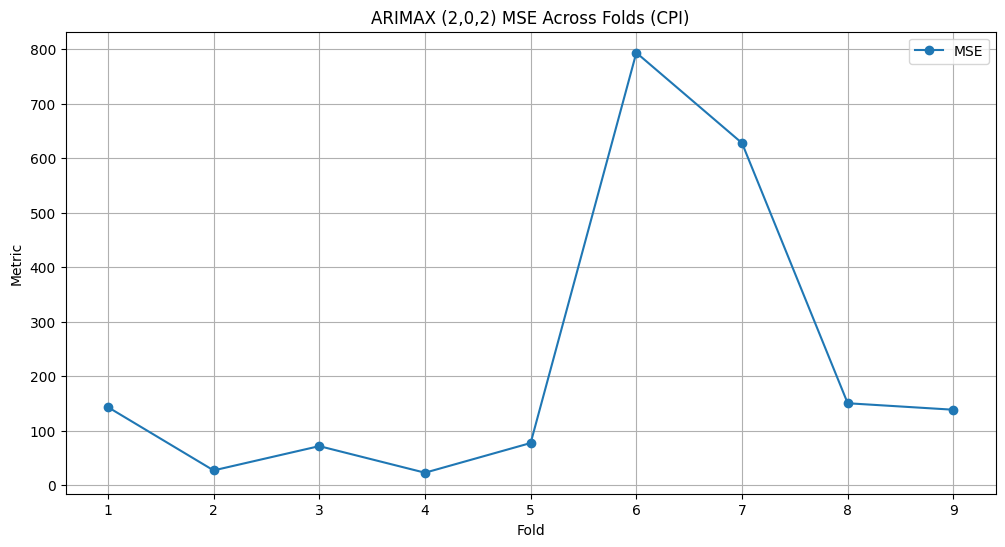

In [ ]:
folds = range(1, tscv.n_splits + 1)

plt.figure(figsize=(12, 6))
plt.plot(folds, mse_per_fold, label='MSE', marker='o')
plt.title('ARIMAX (2,0,2) MSE Across Folds (CPI)')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

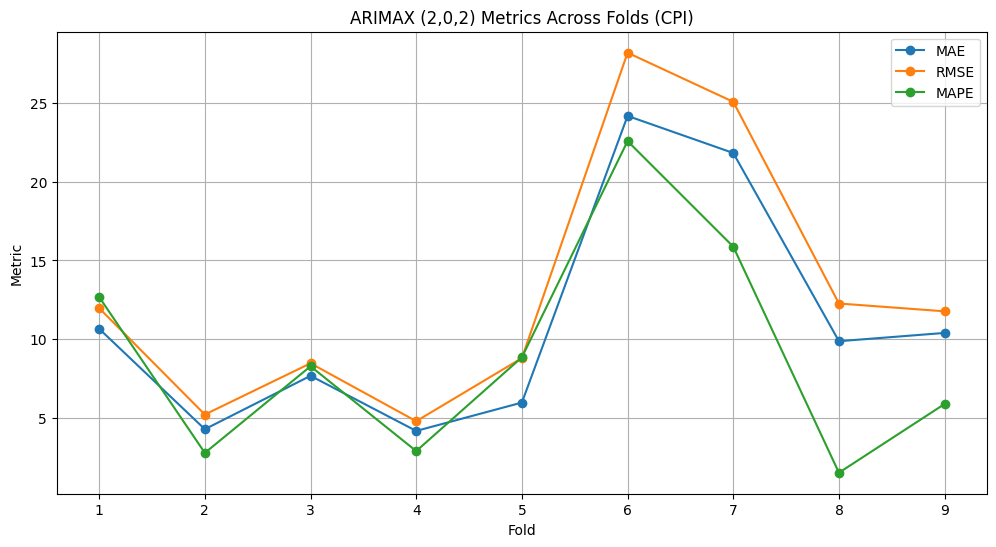

In [ ]:
folds = range(1, tscv.n_splits + 1)

plt.figure(figsize=(12, 6))
plt.plot(folds, mae_per_fold, label='MAE', marker='o')
plt.plot(folds, rmse_per_fold, label='RMSE', marker='o')
plt.plot(folds, mape_per_fold, label='MAPE', marker='o')
plt.title('ARIMAX (2,0,2) Metrics Across Folds (CPI)')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
average_mse = np.mean(mse_per_fold)
average_mae = np.mean(mae_per_fold)
average_rmse = np.mean(rmse_per_fold)
average_mape = np.mean(mape_per_fold)

print(f'ARIMAX (2,0,2) Average Mean Squared Error (MSE): {average_mse:}')
print(f'ARIMAX (2,0,2) Average Mean Absolute Error (MAE): {average_mae:}')
print(f'ARIMAX (2,0,2) Average Root Mean Squared Error (RMSE): {average_rmse:}')
print(f'ARIMAX (2,0,2) Average Mean Absolute Percentage Error (MAPE): {average_mape:}%')


ARIMAX (2,0,2) Average Mean Squared Error (MSE): 228.29710051949692
ARIMAX (2,0,2) Average Mean Absolute Error (MAE): 11.013072079930538
ARIMAX (2,0,2) Average Root Mean Squared Error (RMSE): 12.955173054262644
ARIMAX (2,0,2) Average Mean Absolute Percentage Error (MAPE): 9.049265371153801%


****







# **Blocked Cross-Validation (BCV) for ARIMAX (1,0,0) Model**



Blocked Cross-Validation (BCV) is essential for time-series data analysis where preserving the chronological order of observations is crucial. This method mitigates potential leakage of information from future observations into the training process, a common shortfall in k-fold cross-validation when applied to time-series data.

BCV divides a time series into $k$ contiguous blocks, ensuring that each block is used once as a validation set while the preceding blocks form the training set. This setup mimics real-world scenarios where future data is inherently unseen during model training.

While blocks are sequential, starting points or the order of usage of blocks can be randomized in scenarios where multiple iterations of BCV are feasible, improving model robustness across different time frames.

Analyzing the variance and bias in model performance across different blocks can provide insights into model stability and capability to generalize across different time periods.

\\

$T$ = Total number of observations in the time series \\
$k$ = Number of blocks \\
$n$ = $\frac{T}{k}$ assuming that all blocks are of equal size, though in practice, sizes may vary to maintain completeness of seasonal or cyclic patterns within the blocks.

The division of data into blocks can be defined as:
$X_1, X_2, ..., X_k$ where each $X_i$ represents a block of $n$ observations.


For each block $i$ from $1$ to $k$, we define:
- Training data as $X_{train} = \bigcup_{j=1}^{i-1} X_j$
- Test data as $X_{test} = X_i$

This ensures no overlap between training and test sets, preserving the integrity of the testing process.

\\













****

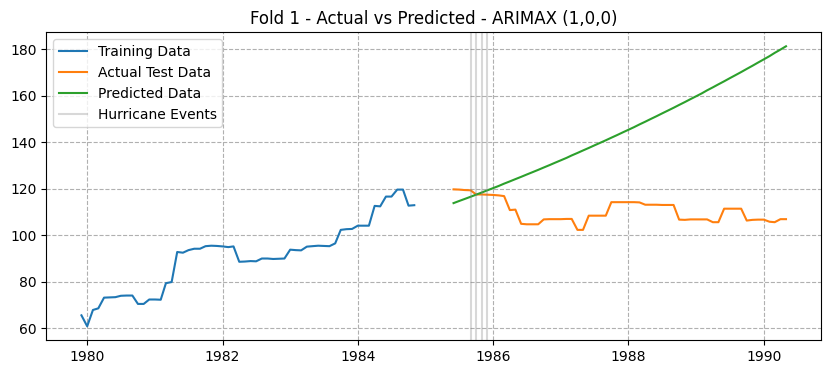

Fold 1: MSE = 1699.4293124853868, MAE = 35.25747356211388, RMSE = 41.224135072617194, MAPE = 34.36724186077929%


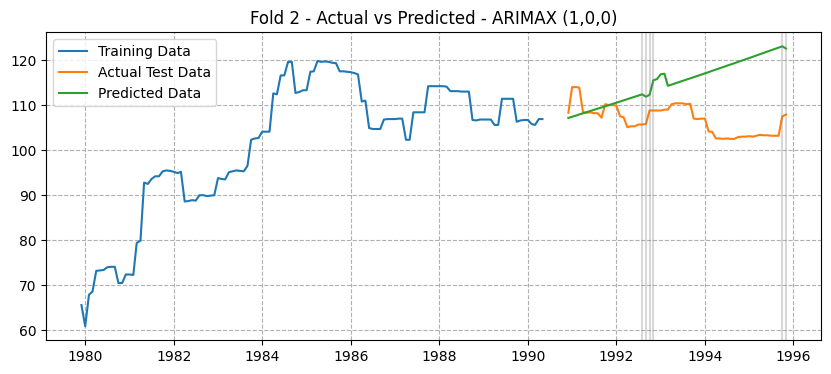

Fold 2: MSE = 124.08869054661413, MAE = 9.124936012316763, RMSE = 11.139510336931966, MAPE = 9.087296967134112%


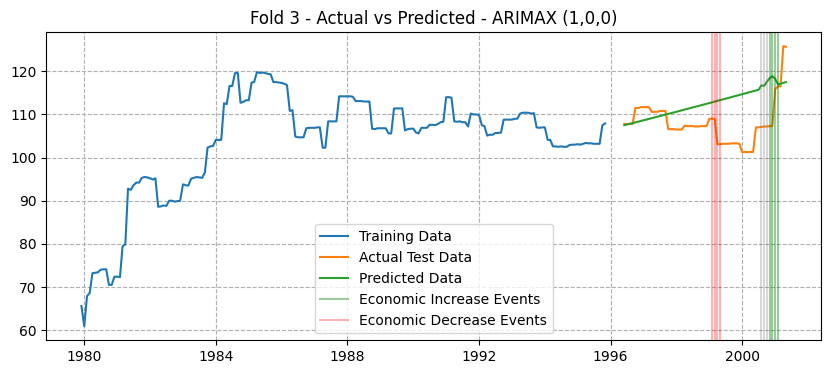

Fold 3: MSE = 53.25364930139417, MAE = 5.931357677087803, RMSE = 7.297509801390757, MAPE = 6.330758210497933%


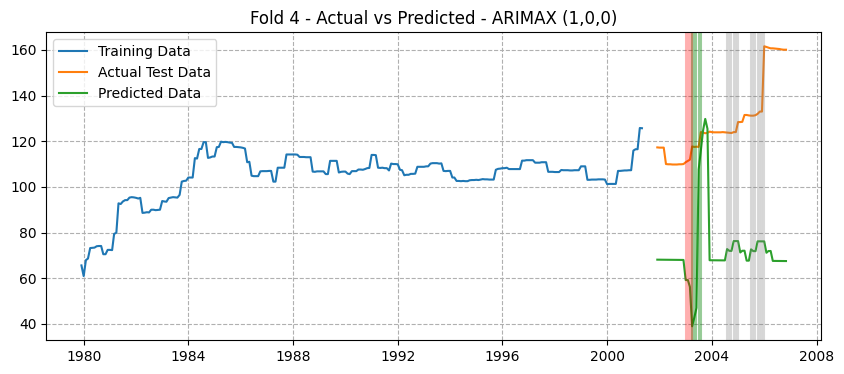

Fold 4: MSE = 3685.4981318660607, MAE = 56.433434166975054, RMSE = 60.708303648397724, MAPE = 42.22947617799973%


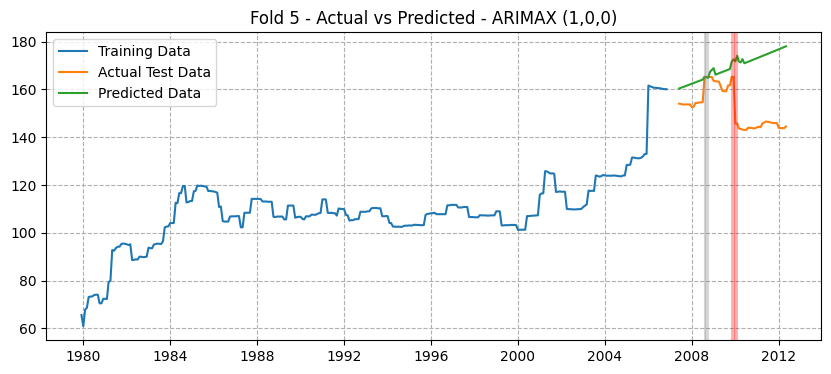

Fold 5: MSE = 446.31251503619654, MAE = 17.497486442082828, RMSE = 21.12610979419061, MAPE = 11.866123026060608%


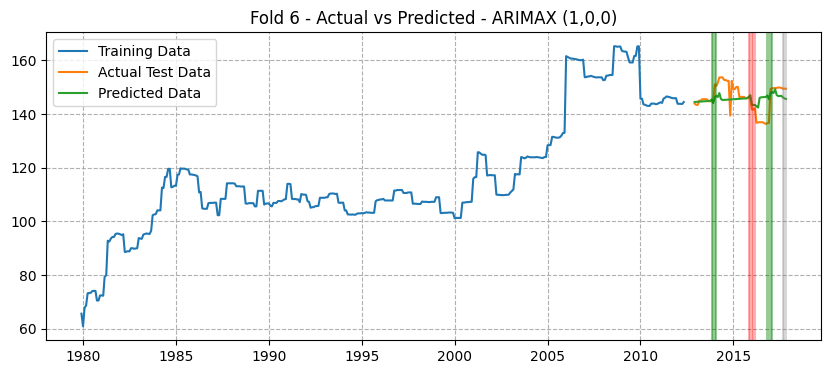

Fold 6: MSE = 23.297395843951733, MAE = 3.6203264116000846, RMSE = 4.826737598414868, MAPE = 3.252414402831528%


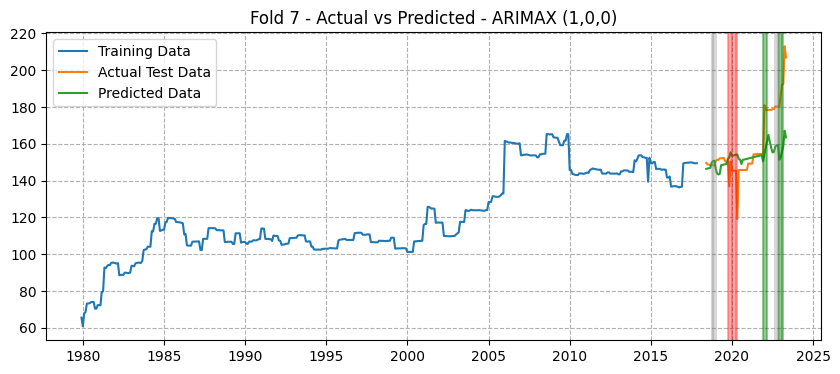

Fold 7: MSE = 258.33730551323475, MAE = 10.943908130324397, RMSE = 16.072874836607006, MAPE = 5.160956865496714%


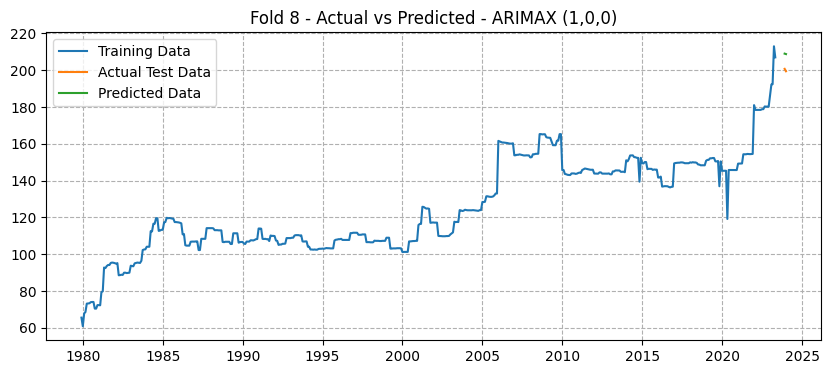

Fold 8: MSE = 77.6674326958032, MAE = 8.797111074051628, RMSE = 8.812912838318736, MAPE = nan%


In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def blocked_cross_validation(endog_series, exog_data, order, gap_size, n_splits):
    label_hurricane_added = False
    label_economic_added = False
    label_economic_added2 = False
    common_dates = endog_series.index.intersection(exog_data.index)
    endog_series = endog_series.loc[common_dates]
    exog_data = exog_data.loc[common_dates]

    n_samples = len(endog_series)
    fold_size = (n_samples - gap_size * n_splits) // n_splits
    mse, mae, rmse_vals, mape = [], [], [], []

    for i in range(n_splits):
        train_end = fold_size * (i + 1) + gap_size * i
        test_start = train_end + gap_size
        test_end = test_start + fold_size if i < n_splits - 1 else None

        train_endog = endog_series.iloc[:train_end]
        train_exog = exog_data.iloc[:train_end]

        test_endog = endog_series.iloc[test_start:test_end]
        test_exog = exog_data.iloc[test_start:test_end]

        test_hurricane_events = exog_data['hurricane'].iloc[test_start:test_end]
        test_economic_events = exog_data['economic'].iloc[test_start:test_end]
        test_economic_events2 = exog_data['economic2'].iloc[test_start:test_end]

        model = SARIMAX(train_endog, exog=train_exog, order=order,
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=0)
        predictions = model_fit.forecast(steps=len(test_endog), exog=test_exog)

        mse_val = mean_squared_error(test_endog, predictions)
        mae_val = mean_absolute_error(test_endog, predictions)
        rmse_val = np.sqrt(mse_val)
        mape_val = np.mean(np.abs((test_endog - predictions) / test_endog.replace(0, np.nan))) * 100

        mse.append(mse_val)
        mae.append(mae_val)
        rmse_vals.append(rmse_val)
        mape.append(mape_val)

        plt.figure(figsize=(10, 4))
        plt.plot(train_endog.index, train_endog, label='Training Data')
        plt.plot(test_endog.index, test_endog, label='Actual Test Data')
        plt.plot(test_endog.index, predictions, label='Predicted Data')

        for event_time in test_hurricane_events[test_hurricane_events == 1].index:
            if not label_hurricane_added:
                plt.axvline(x=event_time, color='gray', label='Hurricane Events', alpha=0.3)
                label_hurricane_added = True
            else:
                plt.axvline(x=event_time, color='gray', alpha=0.3)

        for event_time in test_economic_events[test_economic_events == 1].index:
            if not label_economic_added:
                plt.axvline(x=event_time, color='green', label='Economic Increase Events', alpha=0.4)
                label_economic_added = True
            else:
                plt.axvline(x=event_time, color='green', alpha=0.4)

        for event_time in test_economic_events2[test_economic_events2 == 1].index:
            if not label_economic_added2:
                plt.axvline(x=event_time, color='red', label='Economic Decrease Events', alpha=0.3)
                label_economic_added2 = True
            else:
                plt.axvline(x=event_time, color='red', alpha=0.3)

        plt.title(f'Fold {i + 1} - ARIMAX (1,0,0)')
        plt.legend()
        plt.grid(True, linestyle='--')
        plt.show()

        print(f"Fold {i+1}: MSE = {mse_val}, MAE = {mae_val}, RMSE = {rmse_val}, MAPE = {mape_val}%")

    return mse, mae, rmse_vals, mape

endog_series = CPI['Consumer_Price_Index']
exog_data = merged_data[exog_data3.columns]
order = (1, 0, 0)
gap_size = 6
n_splits = 8

mse, mae, rmse_vals, mape = blocked_cross_validation(endog_series, exog_data, order, gap_size, n_splits)

ARIMAX (1,0,0) Average MSE: 795.9856
ARIMAX (1,0,0) Average MAE: 18.4508
ARIMAX (1,0,0) Average RMSE: 21.4010
ARIMAX (1,0,0) Average MAPE: 16.04%


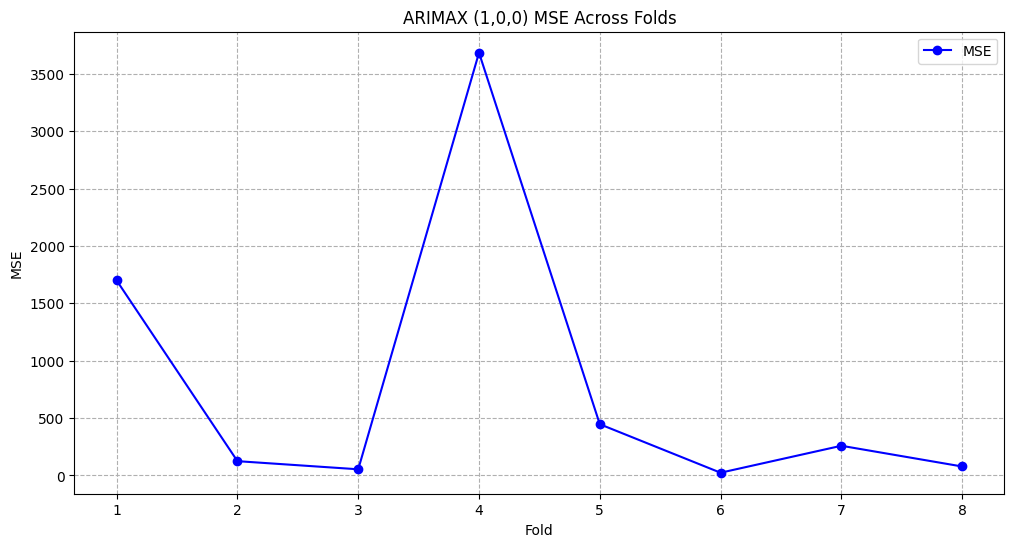

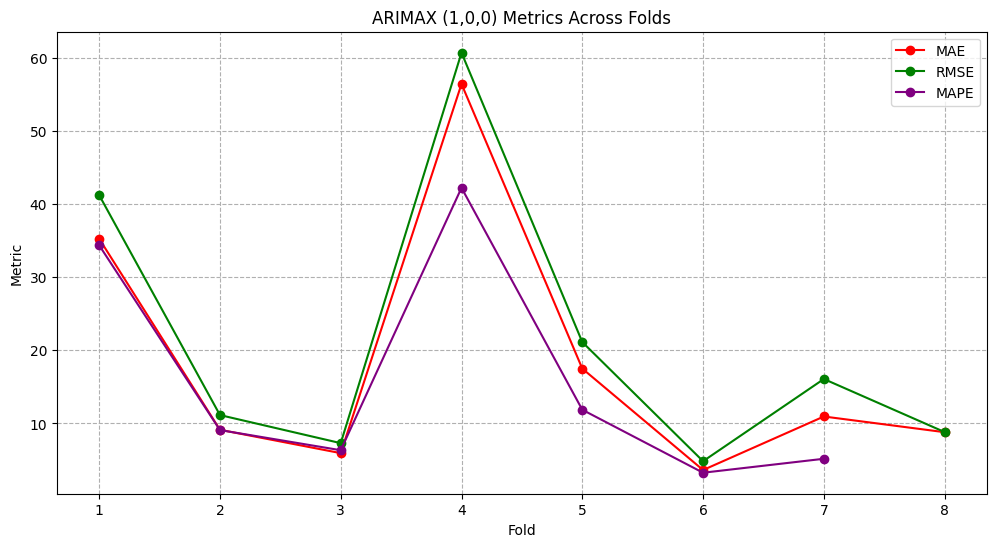

In [ ]:
average_mse = np.mean(mse)
average_mae = np.mean(mae)
average_rmse = np.mean(rmse_vals)
average_mape = np.nanmean(mape)

print(f"ARIMAX (1,0,0) Average MSE: {average_mse:.4f}")
print(f"ARIMAX (1,0,0) Average MAE: {average_mae:.4f}")
print(f"ARIMAX (1,0,0) Average RMSE: {average_rmse:.4f}")
print(f"ARIMAX (1,0,0) Average MAPE: {average_mape:.2f}%")

folds = np.arange(1, n_splits + 1)

plt.figure(figsize=(12, 6))
plt.plot(folds, mse, marker='o', label='MSE', color='blue')
plt.title('ARIMAX (1,0,0) MSE Across Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(folds, mae, marker='o', label='MAE', color='red')
plt.plot(folds, rmse_vals, marker='o', label='RMSE', color='green')
plt.plot(folds, mape, marker='o', label='MAPE', color='purple')
plt.title('ARIMAX (1,0,0) Metrics Across Folds')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

****







# **Blocked Cross-Validation (BCV) for ARIMAX (2,0,2) Model**


















****

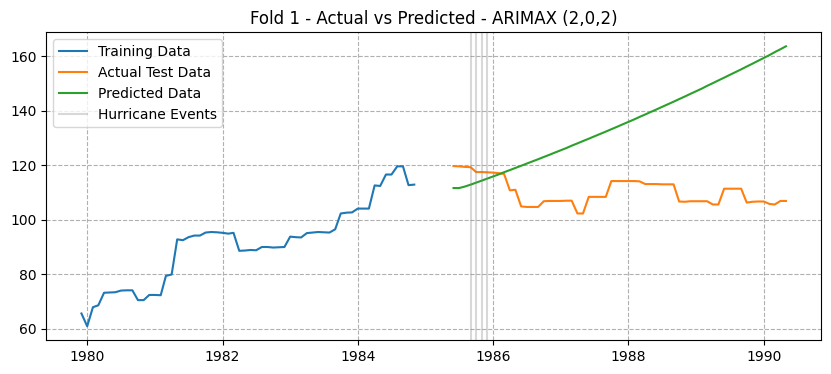

Fold 1: MSE = 967.2451328492224, MAE = 26.602302383493072, RMSE = 31.10056483167504, MAPE = 25.548217956709223%


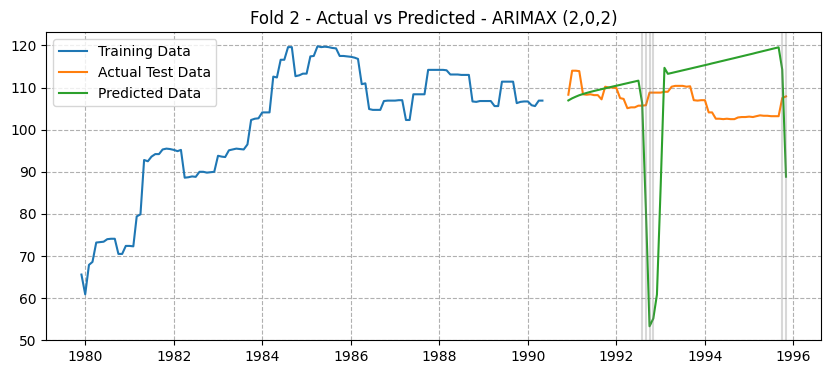

Fold 2: MSE = 244.49713176126076, MAE = 10.685319953840189, RMSE = 15.636404054681522, MAPE = 10.157832296300867%


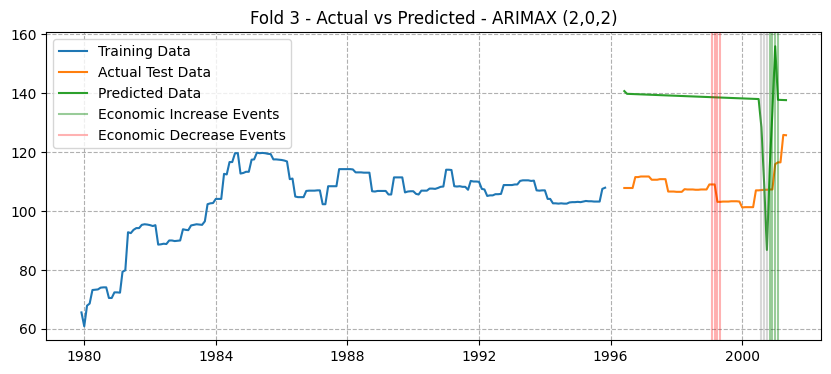

Fold 3: MSE = 931.3860475381363, MAE = 29.68839403295073, RMSE = 30.518618047646527, MAPE = 28.3843358998231%


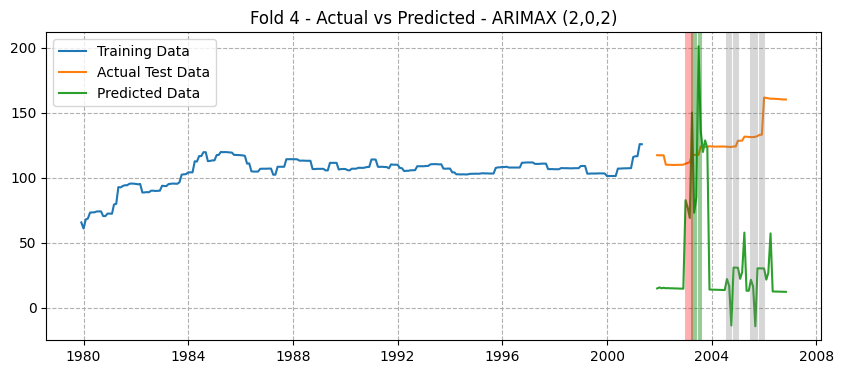

Fold 4: MSE = 10896.928572573534, MAE = 97.22309992163551, RMSE = 104.38835458313122, MAPE = 73.63239877664506%


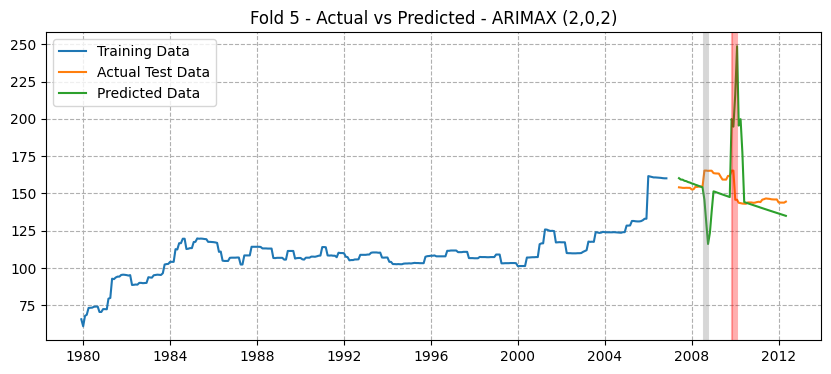

Fold 5: MSE = 562.3537433160749, MAE = 14.112728818689858, RMSE = 23.713998889180942, MAPE = 8.515330584194503%


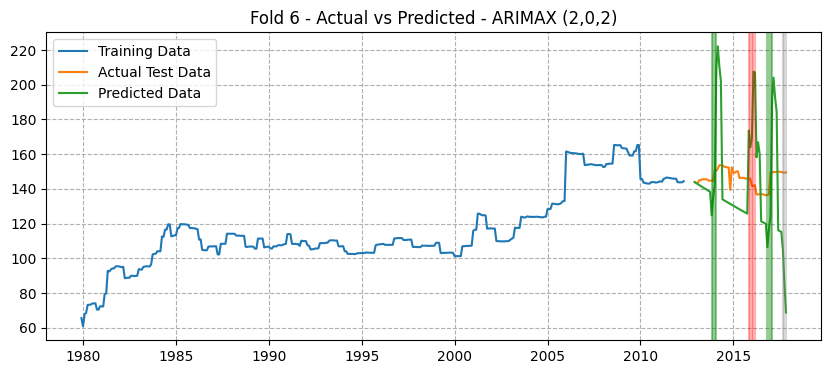

Fold 6: MSE = 1004.4919831033145, MAE = 25.356420140539456, RMSE = 31.693721509209272, MAPE = 19.882792097171187%


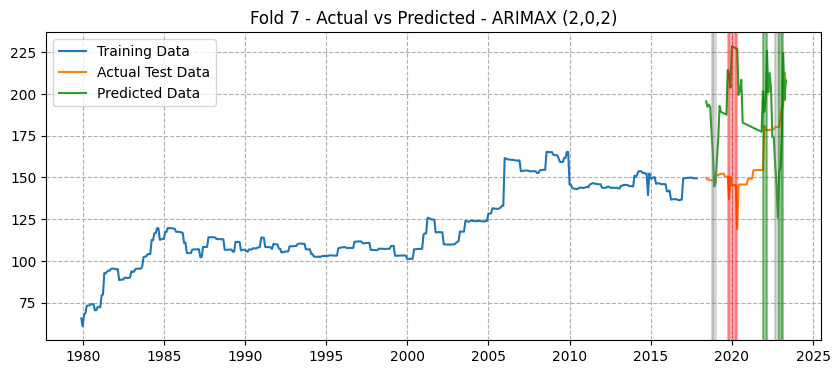

Fold 7: MSE = 1795.9345137952776, MAE = 36.2780731844503, RMSE = 42.37846757252175, MAPE = 26.272124133301073%


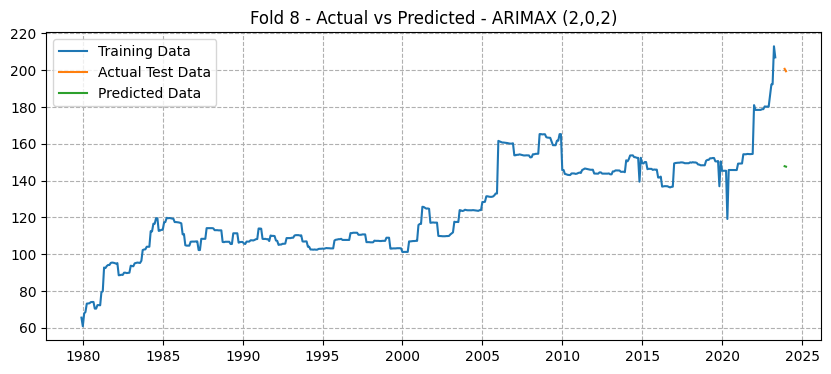

Fold 8: MSE = 2740.850539529003, MAE = 52.350496825757745, RMSE = 52.35313304405958, MAPE = nan%


In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def blocked_cross_validation(endog_series, exog_data, order, gap_size, n_splits):
    label_hurricane_added = False
    label_economic_added = False
    label_economic_added2 = False
    common_dates = endog_series.index.intersection(exog_data.index)
    endog_series = endog_series.loc[common_dates]
    exog_data = exog_data.loc[common_dates]

    n_samples = len(endog_series)
    fold_size = (n_samples - gap_size * n_splits) // n_splits
    mse, mae, rmse_vals, mape = [], [], [], []

    for i in range(n_splits):
        train_end = fold_size * (i + 1) + gap_size * i
        test_start = train_end + gap_size
        test_end = test_start + fold_size if i < n_splits - 1 else None

        train_endog = endog_series.iloc[:train_end]
        train_exog = exog_data.iloc[:train_end]

        test_endog = endog_series.iloc[test_start:test_end]
        test_exog = exog_data.iloc[test_start:test_end]

        test_hurricane_events = exog_data['hurricane'].iloc[test_start:test_end]
        test_economic_events = exog_data['economic'].iloc[test_start:test_end]
        test_economic_events2 = exog_data['economic2'].iloc[test_start:test_end]

        model = SARIMAX(train_endog, exog=train_exog, order=order,
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=0)
        predictions = model_fit.forecast(steps=len(test_endog), exog=test_exog)

        mse_val = mean_squared_error(test_endog, predictions)
        mae_val = mean_absolute_error(test_endog, predictions)
        rmse_val = np.sqrt(mse_val)
        mape_val = np.mean(np.abs((test_endog - predictions) / test_endog.replace(0, np.nan))) * 100

        mse.append(mse_val)
        mae.append(mae_val)
        rmse_vals.append(rmse_val)
        mape.append(mape_val)

        plt.figure(figsize=(10, 4))
        plt.plot(train_endog.index, train_endog, label='Training Data')
        plt.plot(test_endog.index, test_endog, label='Actual Test Data')
        plt.plot(test_endog.index, predictions, label='Predicted Data')

        for event_time in test_hurricane_events[test_hurricane_events == 1].index:
            if not label_hurricane_added:
                plt.axvline(x=event_time, color='gray', label='Hurricane Events', alpha=0.3)
                label_hurricane_added = True
            else:
                plt.axvline(x=event_time, color='gray', alpha=0.3)

        for event_time in test_economic_events[test_economic_events == 1].index:
            if not label_economic_added:
                plt.axvline(x=event_time, color='green', label='Economic Increase Events', alpha=0.4)
                label_economic_added = True
            else:
                plt.axvline(x=event_time, color='green', alpha=0.4)

        for event_time in test_economic_events2[test_economic_events2 == 1].index:
            if not label_economic_added2:
                plt.axvline(x=event_time, color='red', label='Economic Decrease Events', alpha=0.3)
                label_economic_added2 = True
            else:
                plt.axvline(x=event_time, color='red', alpha=0.3)

        plt.title(f'Fold {i + 1} - ARIMAX (2,0,2)')
        plt.legend()
        plt.grid(True, linestyle='--')
        plt.show()

        print(f"Fold {i+1}: MSE = {mse_val}, MAE = {mae_val}, RMSE = {rmse_val}, MAPE = {mape_val}%")

    return mse, mae, rmse_vals, mape

endog_series = CPI['Consumer_Price_Index']
exog_data = merged_data[exog_data3.columns]
order = (2, 0, 2)
gap_size = 6
n_splits = 8

mse, mae, rmse_vals, mape = blocked_cross_validation(endog_series, exog_data, order, gap_size, n_splits)

ARIMAX (2,0,2) Average MSE: 2392.9610
ARIMAX (2,0,2) Average MAE: 36.5371
ARIMAX (2,0,2) Average RMSE: 41.4729
ARIMAX (2,0,2) Average MAPE: 27.48%


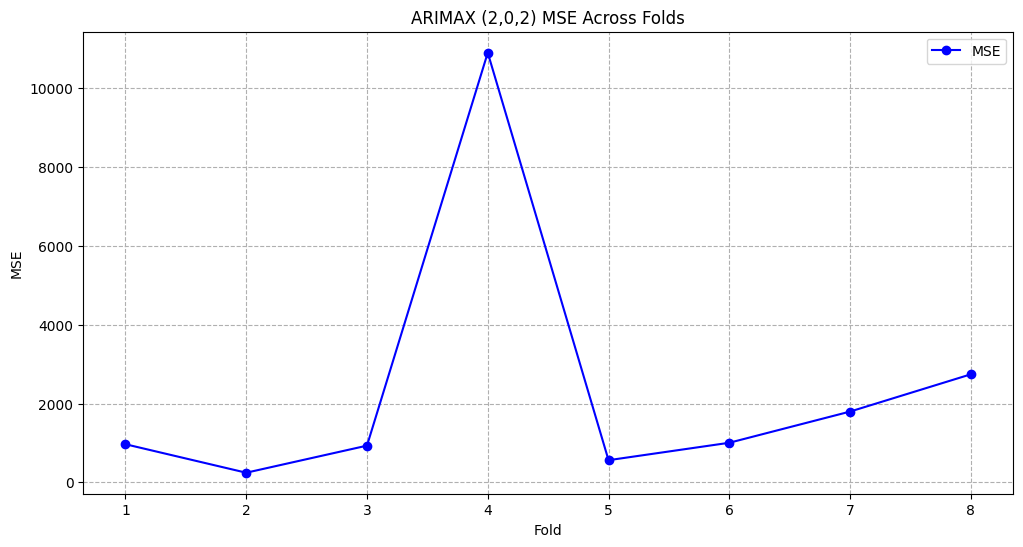

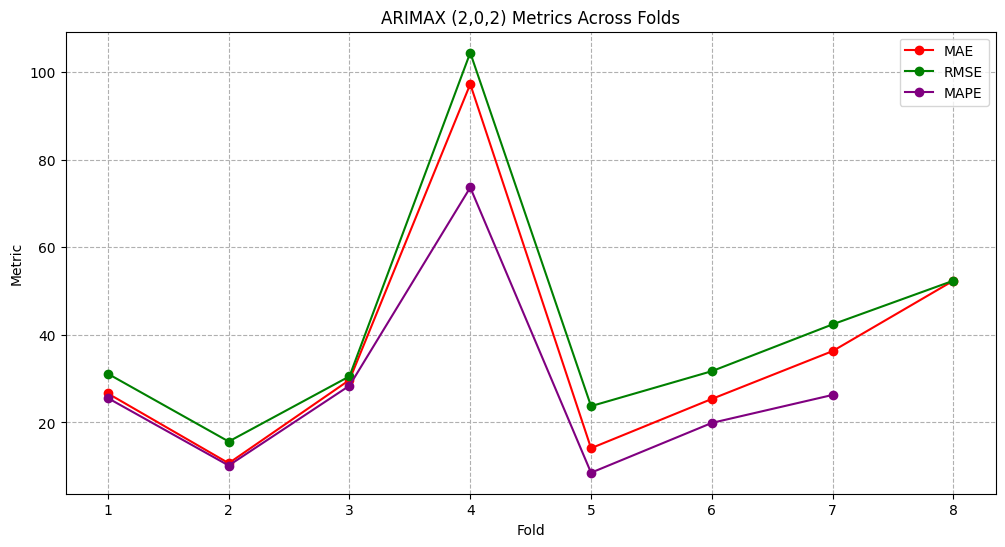

In [ ]:
average_mse = np.mean(mse)
average_mae = np.mean(mae)
average_rmse = np.mean(rmse_vals)
average_mape = np.nanmean(mape)

print(f"ARIMAX (2,0,2) Average MSE: {average_mse:.4f}")
print(f"ARIMAX (2,0,2) Average MAE: {average_mae:.4f}")
print(f"ARIMAX (2,0,2) Average RMSE: {average_rmse:.4f}")
print(f"ARIMAX (2,0,2) Average MAPE: {average_mape:.2f}%")

folds = np.arange(1, n_splits + 1)

plt.figure(figsize=(12, 6))
plt.plot(folds, mse, marker='o', label='MSE', color='blue')
plt.title('ARIMAX (2,0,2) MSE Across Folds')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(folds, mae, marker='o', label='MAE', color='red')
plt.plot(folds, rmse_vals, marker='o', label='RMSE', color='green')
plt.plot(folds, mape, marker='o', label='MAPE', color='purple')
plt.title('ARIMAX (2,0,2) Metrics Across Folds')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.xticks(folds)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()